In [2]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from statsmodels.tools.eval_measures import rmse




In [3]:
data = pd.read_csv("~/Downloads/favorita-grocery-sales-forecasting/items.csv")
len(data.family.unique())


33

In [5]:
oil = pd.read_csv("~/Downloads/favorita-grocery-sales-forecasting/test.csv")
print (len(oil))

3370464


In [6]:
hols = pd.read_csv("~/Downloads/favorita-grocery-sales-forecasting/holidays_events.csv")
print (len(hols))

350


In [7]:
stores = pd.read_csv("~/Downloads/favorita-grocery-sales-forecasting/stores.csv")
print (len(stores))

54


In [8]:
transactions = pd.read_csv("~/Downloads/favorita-grocery-sales-forecasting/transactions.csv")
print (len(transactions))

83488


In [9]:
hols=hols[hols['transferred']==False]
hols

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [533]:
#for terence oil

oil = pd.read_csv("~/Downloads/favorita-grocery-sales-forecasting/oil.csv")

idx = pd.date_range('2013-01-01', '2017-08-31')


oil.index = pd.DatetimeIndex(oil.index)

oil = oil.reindex(idx, fill_value=0)
print(oil)
#oil=oil.fillna(method='pad')



           date  dcoilwtico
2013-01-01    0        0.00
2013-01-02    0        0.00
2013-01-03    0        0.00
2013-01-04    0        0.00
2013-01-05    0        0.00
...         ...         ...
2017-08-27    0        0.00
2017-08-28    0        0.00
2017-08-29    0        0.00
2017-08-30    0        0.00
2017-08-31    0        0.00

[1704 rows x 2 columns]


In [10]:
oil = pd.read_csv("~/Downloads/favorita-grocery-sales-forecasting/oil.csv")


oil['date'] =  pd.to_datetime(oil['date'], format='%Y-%m-%d')
oil = oil.sort_values(by=['date'], ascending=[True])
oil.set_index('date', inplace=True)
oil = oil.resample('D').ffill().reset_index()

oil.dcoilwtico[0]=93.14

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [11]:
oil.head(20)

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,93.12
5,2013-01-06,93.12
6,2013-01-07,93.20
7,2013-01-08,93.21
8,2013-01-09,93.08
9,2013-01-10,93.81


In [530]:
#for terence

hols = pd.read_csv("~/Downloads/favorita-grocery-sales-forecasting/holidays_events.csv")
new_hols=pd.get_dummies(hols, columns=['locale','locale_name'])
new_hols=new_hols.drop(columns=['type', 'description','transferred'])

In [12]:
train = pd.read_csv("~/Downloads/favorita-grocery-sales-forecasting/train.csv")
train['date'] =  pd.to_datetime(train['date'], format='%Y-%m-%d')
print (len(train))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


125497040


In [11]:
#Questions to answer
#1) Does oil price affect sales?
#2) Does holidays affect sales?
#3) Does the type of family(GROCERY/BREAD/CLEANING) 
#4) Does the city and state affect the number of transactions? The richer the city, the more the transactions.
#Or urban and rural areas have different spending habits?
#feature engineering!



#find out across time, how has the type of family categories changed? Do a percentage! Stacked bar chart
#noramlize scale
#split correlation for before earthquake & after earthquake



#personal care items most before earthquake, as oil price decrease, number of personal care item transactions increase.
#after earthqauke, it seems like no relevant correlation with oil price, the most correlated one is lawn and garden.

In [17]:
oil.head(10)


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


In [13]:
#transactions.head(10)
oil = pd.read_csv("~/Downloads/favorita-grocery-sales-forecasting/oil.csv")
transactions = pd.read_csv("~/Downloads/favorita-grocery-sales-forecasting/transactions.csv")

transactions['date'] =  pd.to_datetime(transactions['date'], format='%Y-%m-%d')
oil['date'] =  pd.to_datetime(oil['date'], format='%Y-%m-%d')


#transactions.columns
#group by date and store_nbr
#transactions.head(10)
transactions=transactions.groupby(['date']).sum().reset_index()
transactions_oil=transactions.join(oil.set_index('date'), on='date')
transactions_oil
transactions_oil=transactions_oil.drop(columns=['store_nbr'])
transactions_oil=transactions_oil.dropna()
transactions_oil

,date,transactions,dcoilwtico
1,2013-01-02,93215,93.14
2,2013-01-03,78504,92.97
3,2013-01-04,78494,93.12
6,2013-01-07,75597,93.20
7,2013-01-08,72325,93.21
...,...,...,...
1675,2017-08-09,85452,49.59
1676,2017-08-10,83064,48.54
1677,2017-08-11,89551,48.81
1680,2017-08-14,85448,47.59


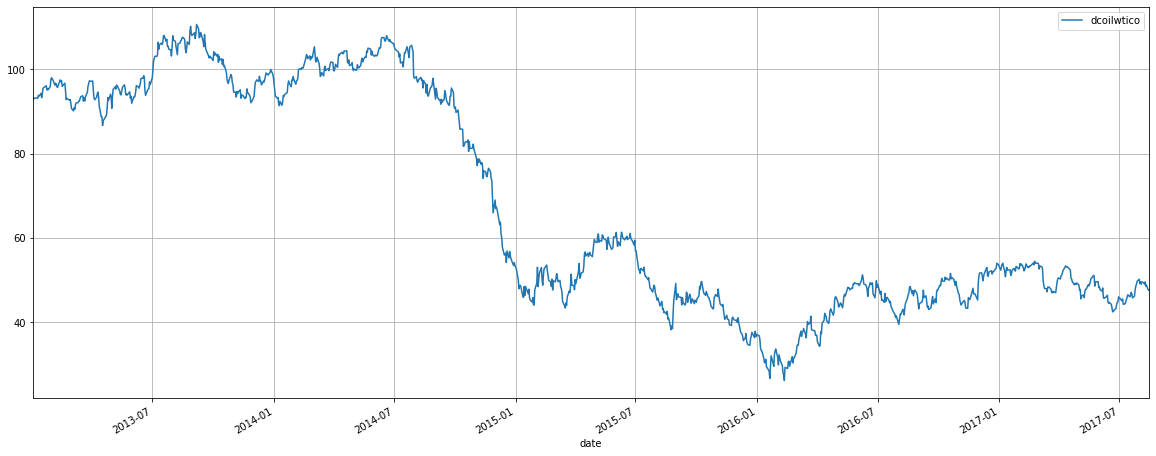

In [14]:
transactions_oil.plot(x ='date', y='dcoilwtico', kind = 'line',grid=True,figsize=(20,8))	

In [106]:

hols['date'] =  pd.to_datetime(hols['date'], format='%Y-%m-%d')
hols.type.unique()

holiday=hols[hols['type']=='Holiday']
holiday['isHol']=1
holiday



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date,type,locale,locale_name,description,transferred,isHol
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,1
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,1
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,1
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,1
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,1
...,...,...,...,...,...,...,...
338,2017-11-12,Holiday,Local,Ambato,Independencia de Ambato,False,1
340,2017-12-06,Holiday,Local,Quito,Fundacion de Quito,True,1
341,2017-12-08,Holiday,Local,Loja,Fundacion de Loja,False,1
344,2017-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,False,1


In [107]:
transactions_oil_holiday=transactions_oil.join(holiday.set_index('date'), on='date')



In [108]:
transactions_oil_holiday = transactions_oil_holiday.fillna(0)

In [449]:
transactions_oil_holiday_before=transactions_oil_holiday[transactions_oil_holiday['date']<'2016-04-01']
transactions_oil_holiday_after=transactions_oil_holiday[transactions_oil_holiday['date']>='2016-04-01']



In [451]:
print(transactions_oil_holiday.corr())
print(transactions_oil_holiday_before.corr())
print(transactions_oil_holiday_after.corr())

              transactions  dcoilwtico     isHol
transactions      1.000000   -0.305264  0.035409
dcoilwtico       -0.305264    1.000000  0.005843
isHol             0.035409    0.005843  1.000000
              transactions  dcoilwtico     isHol
transactions      1.000000   -0.299158  0.027193
dcoilwtico       -0.299158    1.000000  0.010899
isHol             0.027193    0.010899  1.000000
              transactions  dcoilwtico     isHol
transactions      1.000000    0.204897  0.062896
dcoilwtico        0.204897    1.000000 -0.076613
isHol             0.062896   -0.076613  1.000000


In [102]:
#Questions to answer
#1) Does oil price affect sales?
#--Negative correlation of -0.3, means that as oil price decrease, the higher number of transactions.
#But it is not very strong.

#2) Does holidays affect sales?
#--small correlation so not really.

#3) Does the type of family(GROCERY/BREAD/CLEANING) 
#4) Does the city and state affect the number of transactions? The richer the city, the more the transactions.
#Or urban and rural areas have different spending habits?

In [113]:
train.store_nbr.unique()

array([25,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39,
       40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 36, 53, 20, 29, 21,
       42, 22, 52])

In [203]:
train.head(10)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN
5,5,2013-01-01,25,108786,3.0,NaN
6,6,2013-01-01,25,108797,1.0,NaN
7,7,2013-01-01,25,108952,1.0,NaN
8,8,2013-01-01,25,111397,13.0,NaN
9,9,2013-01-01,25,114790,3.0,NaN


In [161]:
#find out top 10 items that sell best across each month across each store
train_1=train[train['store_nbr']==1]
train_1.columns



Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion'], dtype='object')

In [174]:
train_1_groupedby_date=train_1.groupby([train_1['date'].dt.strftime('%B-%Y'),'item_nbr']).agg({'unit_sales': np.sum})

In [177]:
train_1_groupedby_date

unit_sales
date           item_nbr            
April-2013     96995           20.0
               103520          58.0
               103665          69.0
               105574         136.0
               105575         248.0
...                             ...
September-2016 2031273        149.0
               2031309         91.0
               2031378        130.0
               2036676          1.0
               2037487        117.0

[130347 rows x 1 columns]

In [179]:
train_1_groupedby_date=train_1_groupedby_date.reset_index(level=['date', 'item_nbr'])

In [185]:
len(train_1_groupedby_date[train_1_groupedby_date['date']=='June-2013'].item_nbr.unique())

1438

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


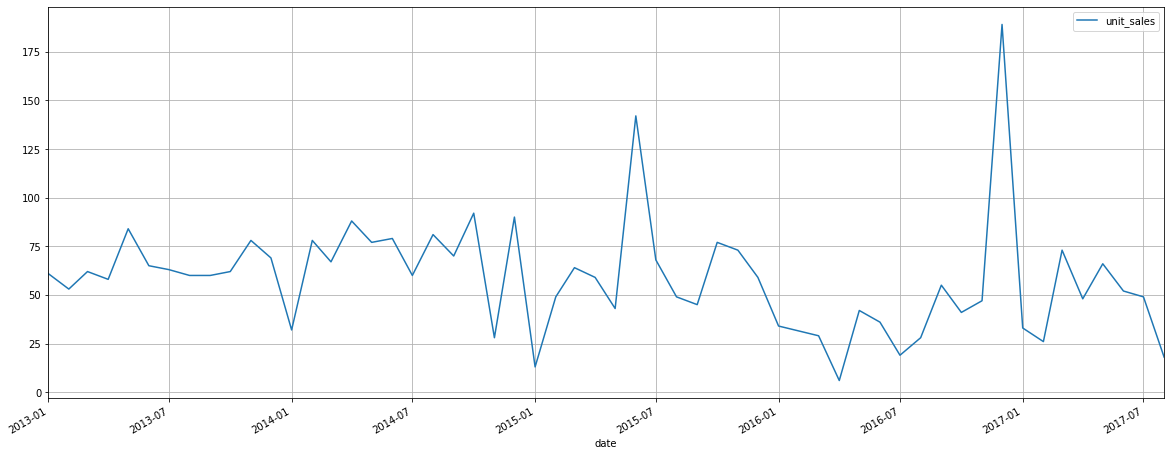

In [255]:
#we want to know for one particular item, how is the sales trend like monthly over 3 years?

train_1_103520=train_1_groupedby_date[train_1_groupedby_date['item_nbr']==103520]
train_1_103520['date'] =  pd.to_datetime(train_1_103520['date'], format='%B-%Y')


train_1_103520.plot(x ='date', y='unit_sales', kind = 'line',grid=True,figsize=(20,8))	
#	item_nbr	family	class	perishable
#3	103520	GROCERY I	1028	0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


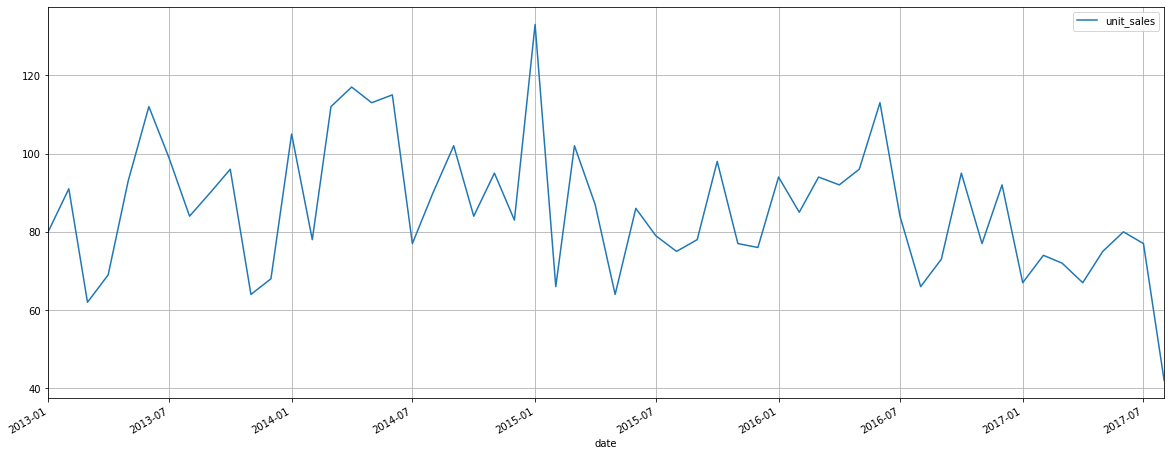

In [254]:
#we want to know for one particular item, how is the sales trend like monthly over 3 years?

train_1_103665=train_1_groupedby_date[train_1_groupedby_date['item_nbr']==103665]
train_1_103665['date'] =  pd.to_datetime(train_1_103665['date'], format='%B-%Y')


train_1_103665.plot(x ='date', y='unit_sales', kind = 'line',grid=True,figsize=(20,8))	
#	item_nbr	family	class	perishable
#4	103665	BREAD/BAKERY	2712	1




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


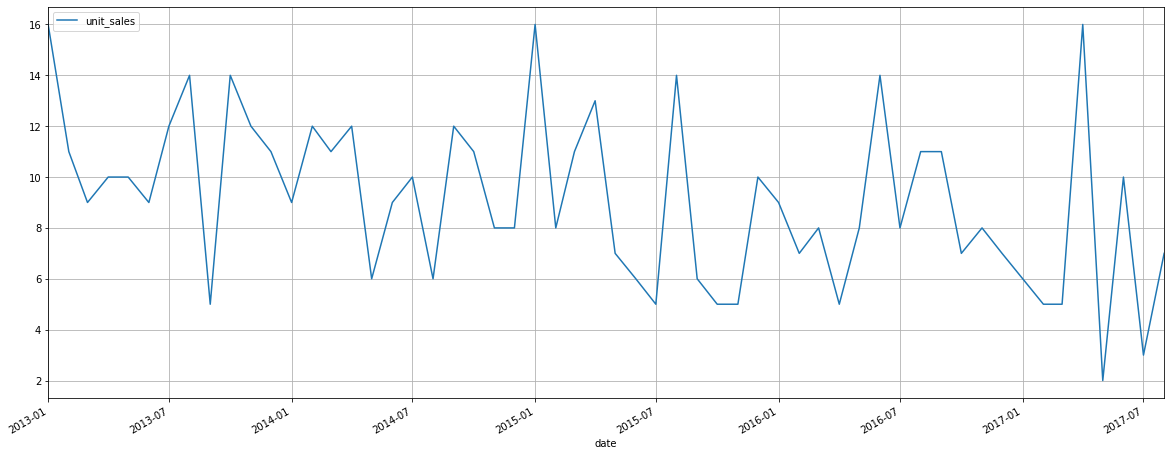

In [253]:
#we want to know for one particular item, how is the sales trend like monthly over 3 years?

train_1_121964=train_1_groupedby_date[train_1_groupedby_date['item_nbr']==121964]
train_1_121964['date'] =  pd.to_datetime(train_1_121964['date'], format='%B-%Y')


train_1_121964.plot(x ='date', y='unit_sales', kind = 'line',grid=True,figsize=(20,8))	
#	item_nbr	family	class	perishable
#53	121964	AUTOMOTIVE	6810	0





In [204]:
train

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN
...,...,...,...,...,...,...
125497035,125497035,2017-08-15,54,2089339,4.0,False
125497036,125497036,2017-08-15,54,2106464,1.0,True
125497037,125497037,2017-08-15,54,2110456,192.0,False
125497038,125497038,2017-08-15,54,2113914,198.0,True


In [15]:
train_with_family=train.join(data.set_index('item_nbr'), on='item_nbr')



NameError: name 'train_with_familh' is not defined

In [20]:
train_with_family

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
0,0,2013-01-01,25,103665,7.0,NaN,BREAD/BAKERY,2712,1
1,1,2013-01-01,25,105574,1.0,NaN,GROCERY I,1045,0
2,2,2013-01-01,25,105575,2.0,NaN,GROCERY I,1045,0
3,3,2013-01-01,25,108079,1.0,NaN,GROCERY I,1030,0
4,4,2013-01-01,25,108701,1.0,NaN,DELI,2644,1
...,...,...,...,...,...,...,...,...,...
125497035,125497035,2017-08-15,54,2089339,4.0,False,GROCERY I,1006,0
125497036,125497036,2017-08-15,54,2106464,1.0,True,BEVERAGES,1148,0
125497037,125497037,2017-08-15,54,2110456,192.0,False,BEVERAGES,1120,0
125497038,125497038,2017-08-15,54,2113914,198.0,True,CLEANING,3040,0


In [21]:
train_with_family_groupbydate=train_with_family.groupby([train_with_family['date'].dt.strftime('%B-%Y'),'family']).agg({'unit_sales': np.sum})

In [22]:

train_with_family_groupbydate=train_with_family_groupbydate.reset_index(level=['date', 'family'])

In [23]:
train_with_family_groupbydate_produce=train_with_family_groupbydate[train_with_family_groupbydate['family']=='PRODUCE']

In [24]:
train_with_family_groupbydate_produce

,date,family,unit_sales
20,April-2013,PRODUCE,6.308000e+03
42,April-2014,PRODUCE,7.152000e+03
67,April-2015,PRODUCE,7.162000e+03
98,April-2016,PRODUCE,3.621327e+06
131,April-2017,PRODUCE,3.757053e+06
154,August-2013,PRODUCE,8.118000e+03
176,August-2014,PRODUCE,8.265000e+03
207,August-2015,PRODUCE,3.562252e+06
239,August-2016,PRODUCE,3.489905e+06
272,August-2017,PRODUCE,1.855595e+06


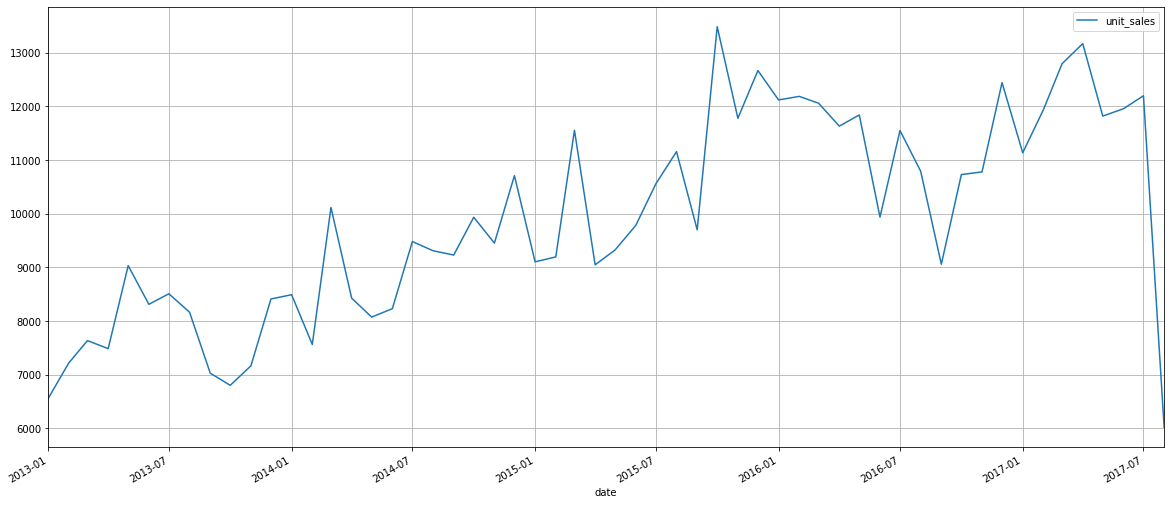

In [252]:
train_with_family_groupbydate_automotive.plot(x ='date', y='unit_sales', kind = 'line',grid=True,figsize=(20,9))	
#train_with_family_groupbydate_automotive


In [26]:
train_with_family_groupbydate_groceries=train_with_family_groupbydate[train_with_family_groupbydate['family']=='GROCERY I']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


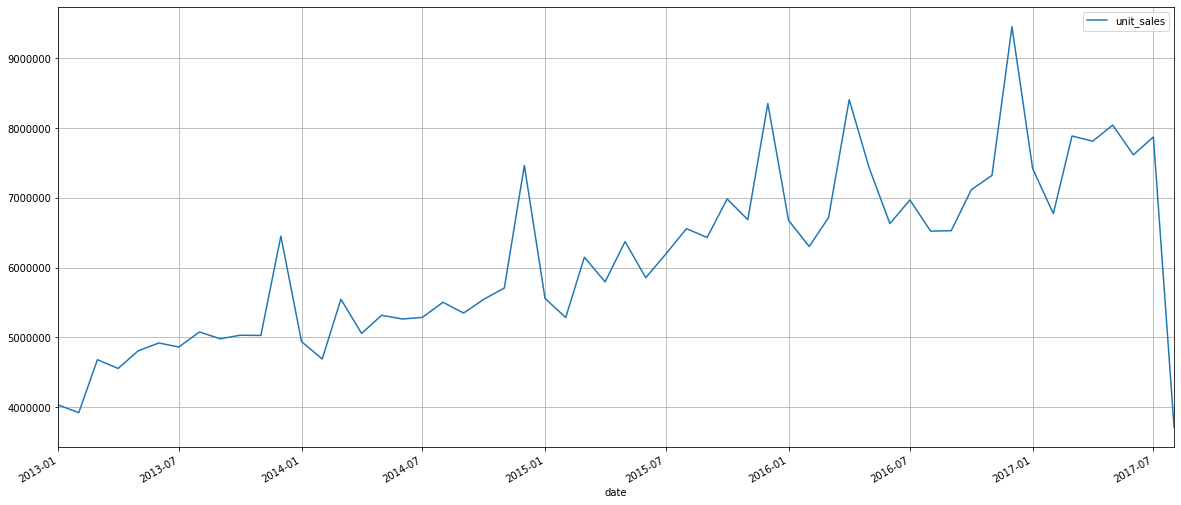

In [27]:
train_with_family_groupbydate_groceries['date'] =  pd.to_datetime(train_with_family_groupbydate_groceries['date'], format='%B-%Y')
train_with_family_groupbydate_groceries.plot(x ='date', y='unit_sales', kind = 'line',grid=True,figsize=(20,9))	




In [414]:
for i in data.family.unique()

array(['GROCERY I', 'CLEANING', 'BREAD/BAKERY', 'DELI', 'POULTRY', 'EGGS',
       'PERSONAL CARE', 'LINGERIE', 'BEVERAGES', 'AUTOMOTIVE', 'DAIRY',
       'GROCERY II', 'MEATS', 'FROZEN FOODS', 'HOME APPLIANCES',
       'SEAFOOD', 'PREPARED FOODS', 'LIQUOR,WINE,BEER', 'BEAUTY',
       'HARDWARE', 'LAWN AND GARDEN', 'PRODUCE', 'HOME AND KITCHEN II',
       'HOME AND KITCHEN I', 'MAGAZINES', 'HOME CARE', 'PET SUPPLIES',
       'BABY CARE', 'SCHOOL AND OFFICE SUPPLIES',
       'PLAYERS AND ELECTRONICS', 'CELEBRATION', 'LADIESWEAR', 'BOOKS'],
      dtype=object)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

0.7052356444964485
GROCERY I
0.7568777299294044
BREAD/BAKERY
0.7821266392307802
DELI


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

0.7992645516415774
PERSONAL CARE


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

final
0.7992645516415774
PERSONAL CARE


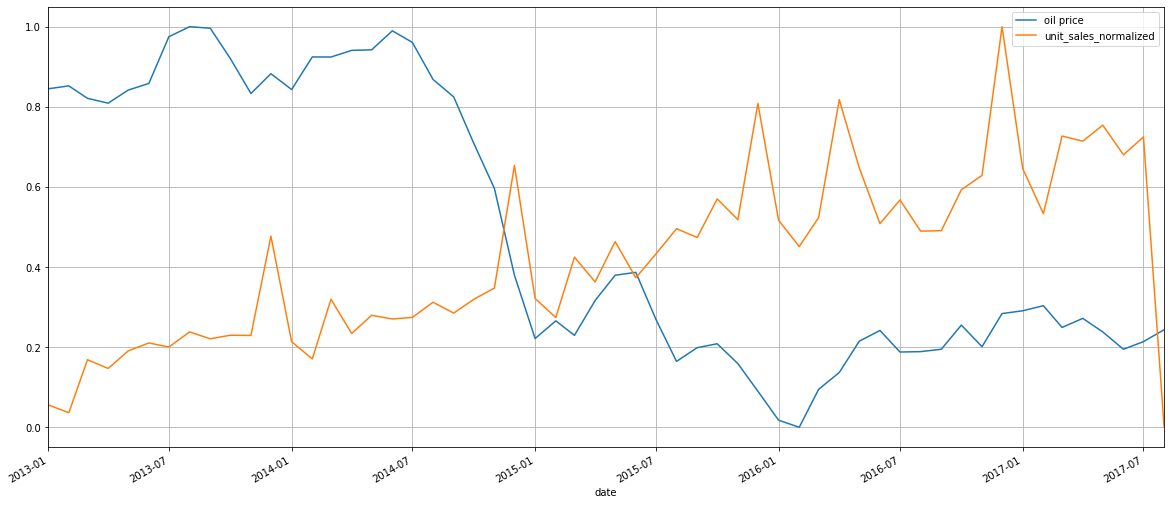

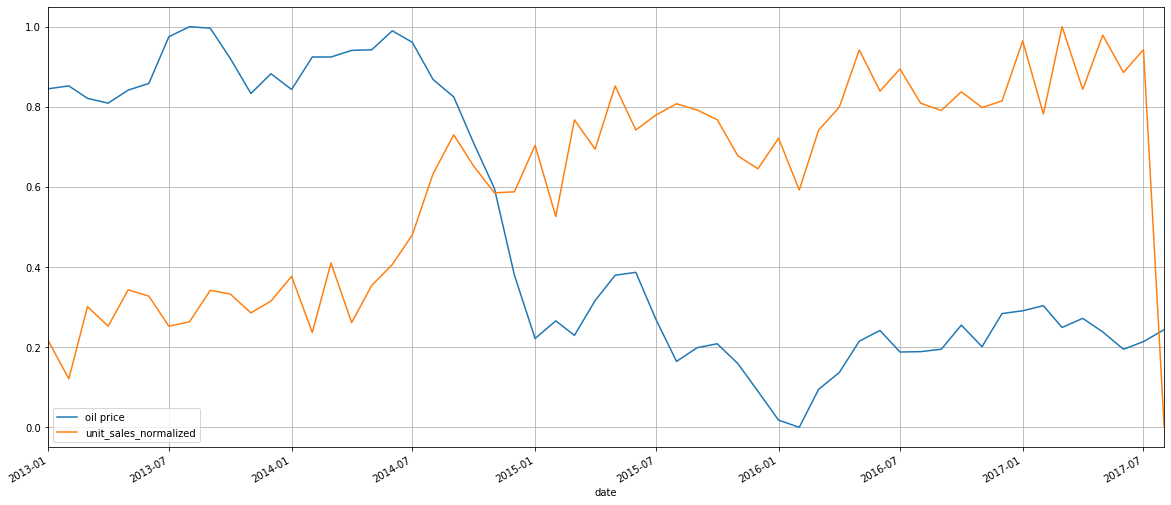

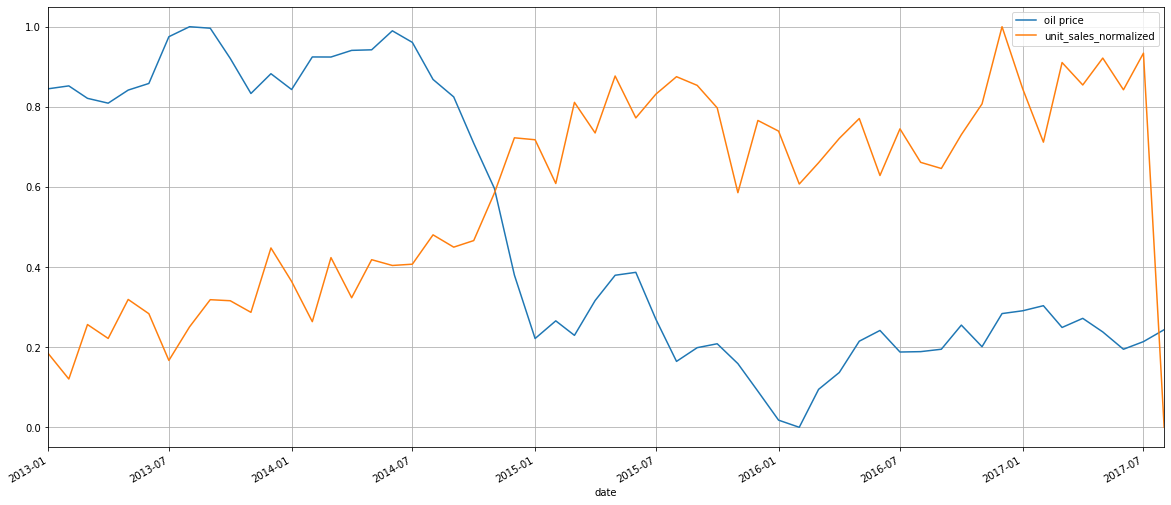

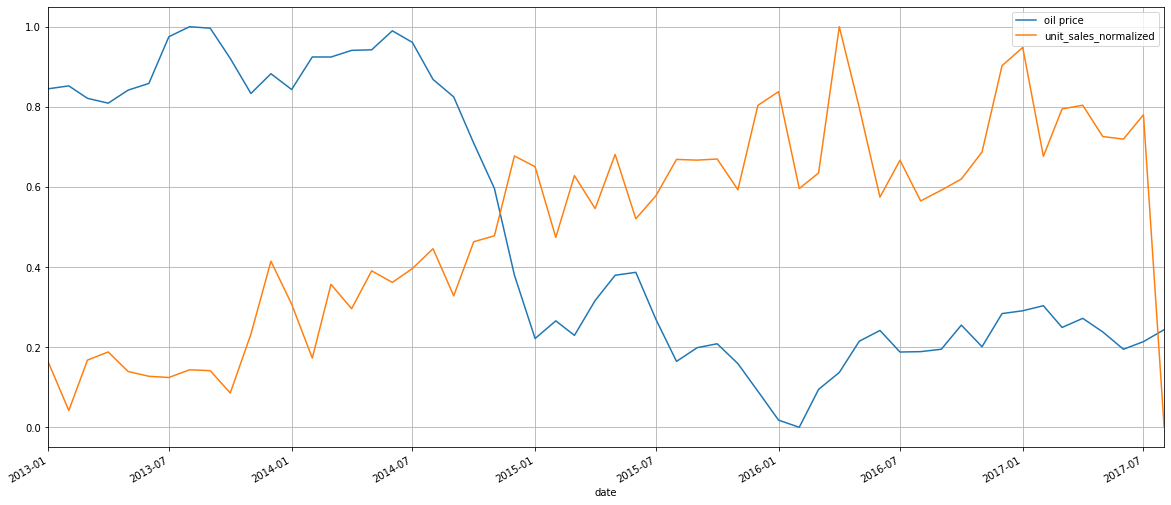

In [441]:
#whole duration
previous=0
familyy='test'
for i in data.family.unique():

    family=i
    train_with_family_groupbydate_family=train_with_family_groupbydate[train_with_family_groupbydate['family']==family]
    train_with_family_groupbydate_family['date'] =  pd.to_datetime(train_with_family_groupbydate_family['date'], format='%B-%Y')
    #train_with_family_groupbydate_family.plot(x ='date', y='unit_sales', kind = 'line',grid=True,figsize=(20,9))	

    train_with_family_groupbydate_family=train_with_family_groupbydate_family.dropna()

    a=transactions_oil_monthly.join(train_with_family_groupbydate_family.set_index('date'), on='date')
    b=a.drop(columns=['date','family'])

    import pandas as pd
    from sklearn import preprocessing

    x = b.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    corr=df.corr()
    corr_abs=abs(corr.values[0][1])
    if corr_abs > previous:
        previous=corr_abs
        familyy=i
        c=a.join(df)
        c=c.rename(columns={0: "oil price", 1: "unit_sales_normalized"})
        print (previous)
        print (familyy)
        c.plot(x ='date', y=['oil price','unit_sales_normalized'], kind = 'line',grid=True,figsize=(20,9))

print ('final')
print (previous)
print (familyy)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a c

0.7532364857922912
GROCERY I
0.8326858478243446
CLEANING
0.8562546137795785
DELI


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a c

0.8661106232229512
PERSONAL CARE


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a c

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by MinMaxScaler.

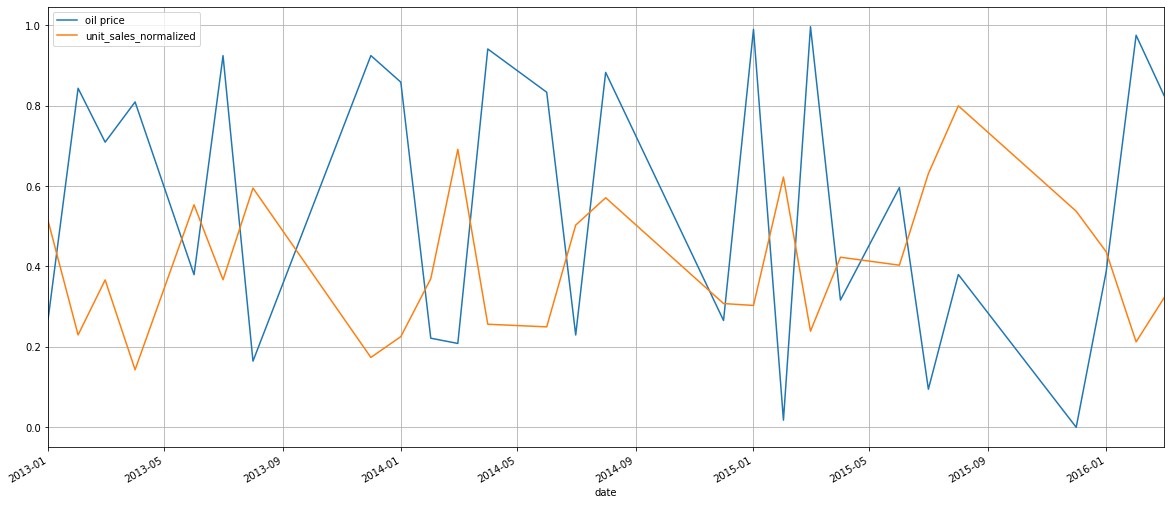

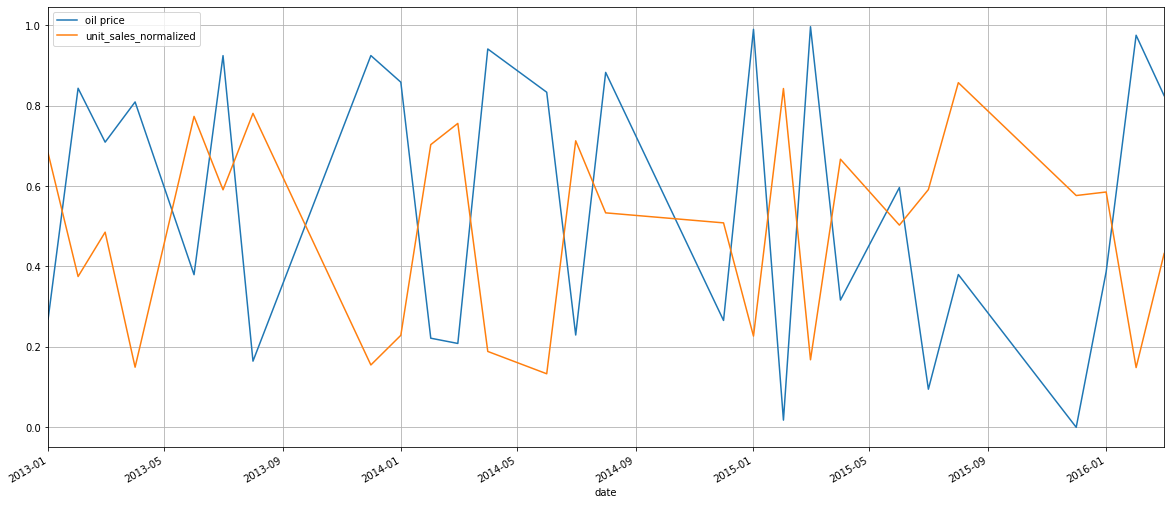

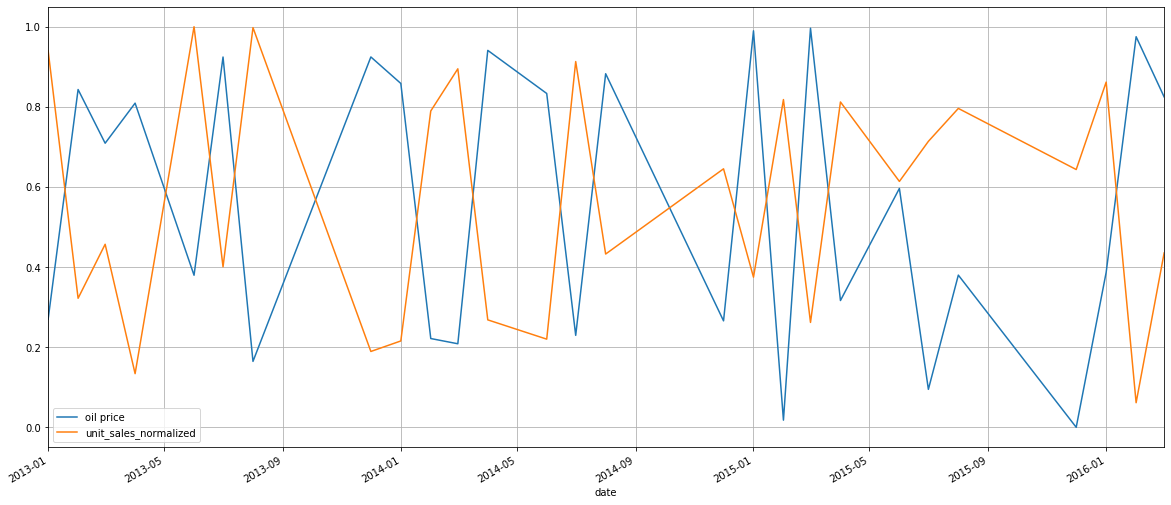

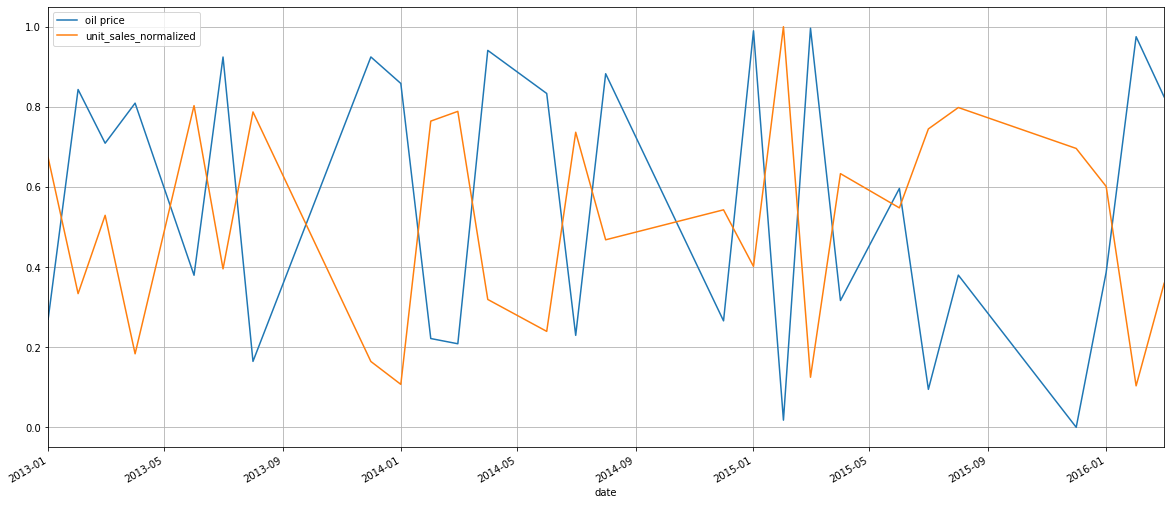

In [36]:
#before 16 April 2016 onwards
previous=0
familyy='test'

for i in data.family.unique():

    family=i
    print (i)
    train_with_family_groupbydate_family=train_with_family_groupbydate[train_with_family_groupbydate['family']==family]
    train_with_family_groupbydate_family['date'] =  pd.to_datetime(train_with_family_groupbydate_family['date'], format='%B-%Y')
    #train_with_family_groupbydate_family.plot(x ='date', y='unit_sales', kind = 'line',grid=True,figsize=(20,9))	
    
    train_with_family_groupbydate_family=train_with_family_groupbydate_family[train_with_family_groupbydate_family['date'] < 'April-2016']


 
    
    train_with_family_groupbydate_family=train_with_family_groupbydate_family.dropna()

    a=transactions_oil_monthly.join(train_with_family_groupbydate_family.set_index('date'), on='date')
    a=a.dropna()
    b=a.drop(columns=['date','family'])

    import pandas as pd
    from sklearn import preprocessing

    x = b.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    corr=df.corr()
    corr_abs=abs(corr.values[0][1])
    if corr_abs > previous:
        previous=corr_abs
        familyy=i
        c=a.join(df)
        c=c.rename(columns={0: "oil price", 1: "unit_sales_normalized"})
        print (previous)
        print (familyy)
        c=c.dropna()
        c.plot(x ='date', y=['oil price','unit_sales_normalized'], kind = 'line',grid=True,figsize=(20,9))

print ('final')
print (previous)
print (familyy)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


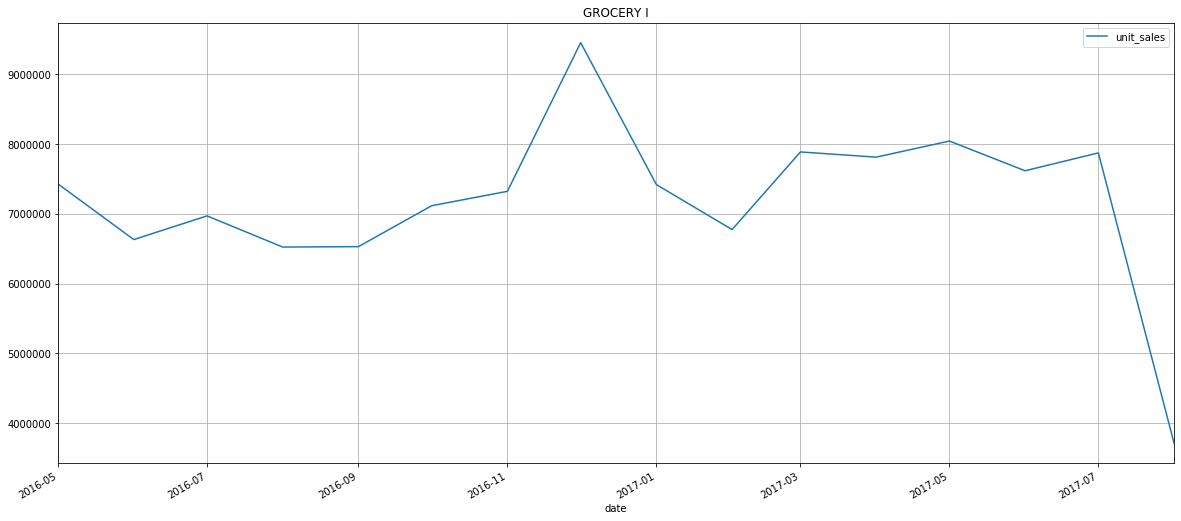

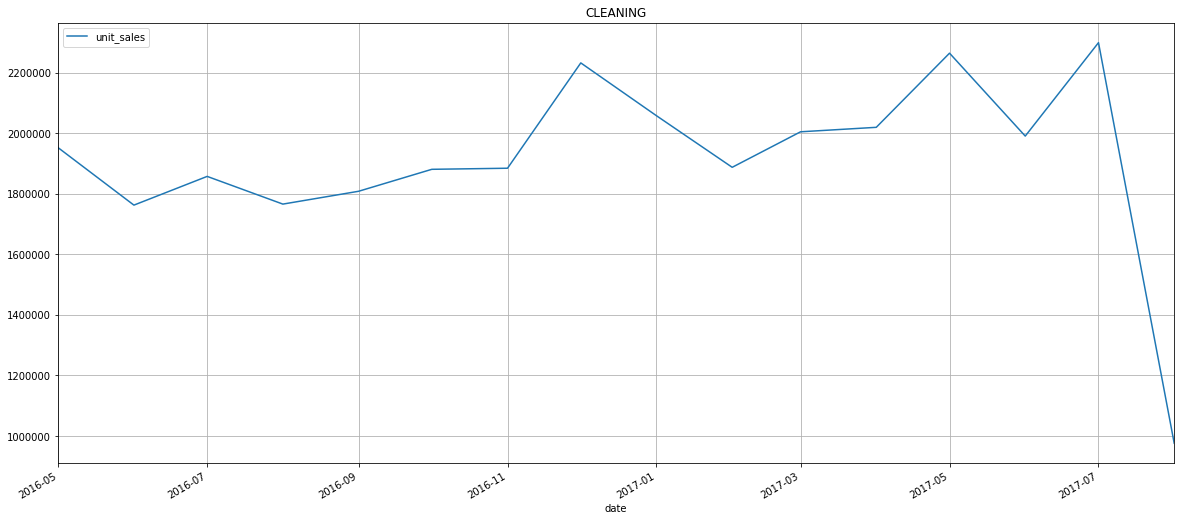

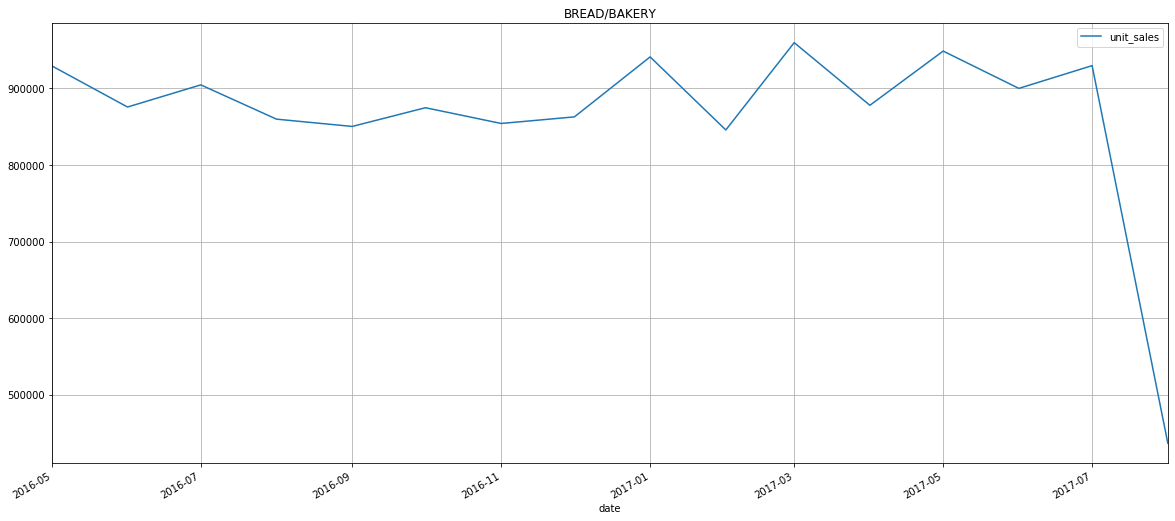

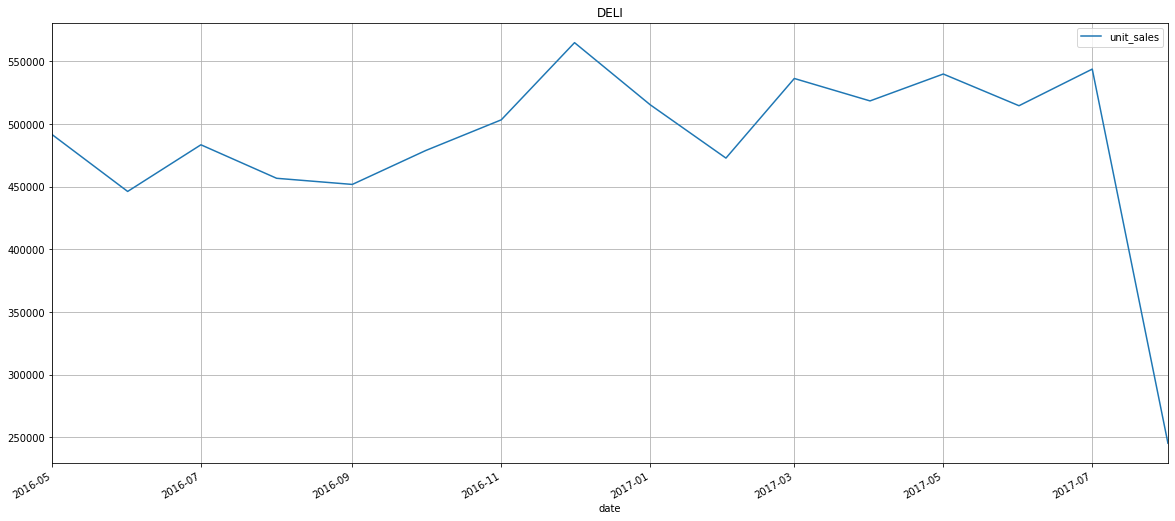

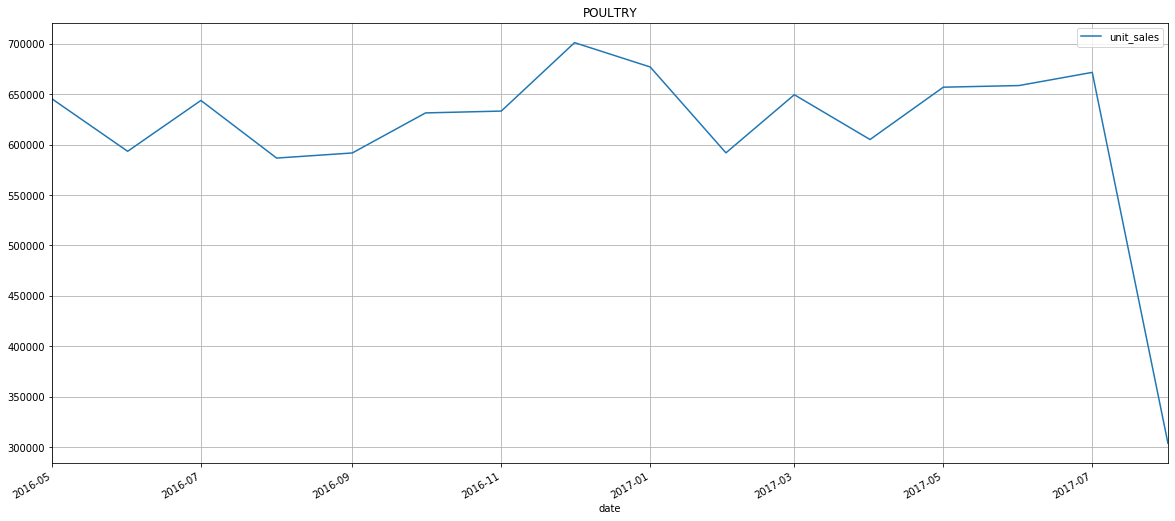

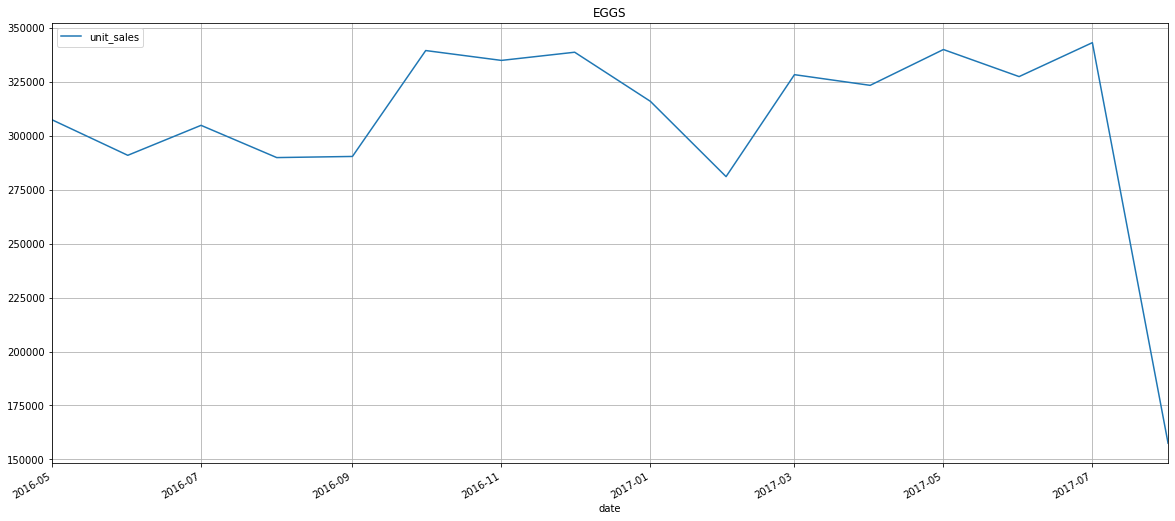

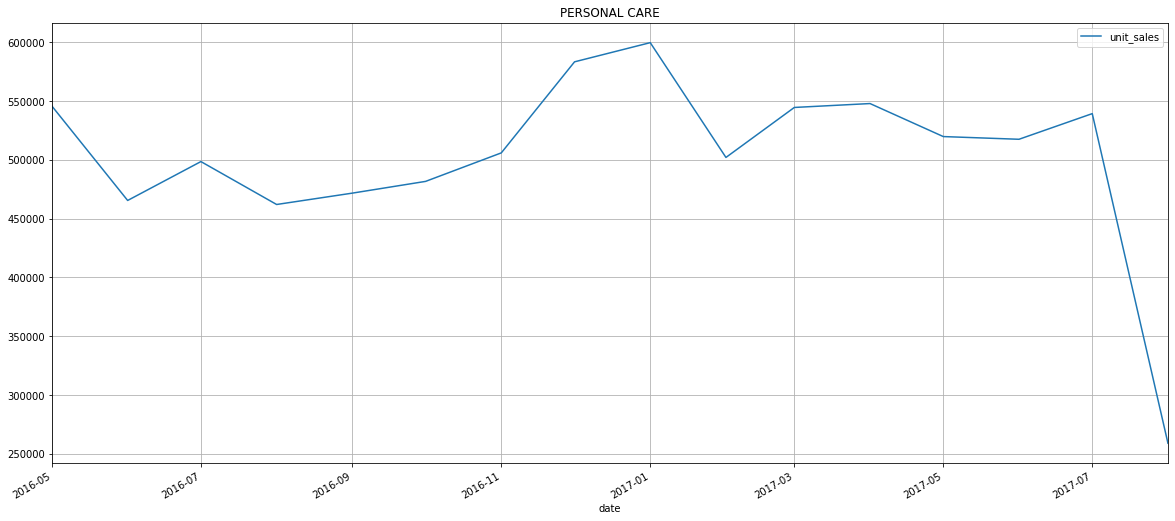

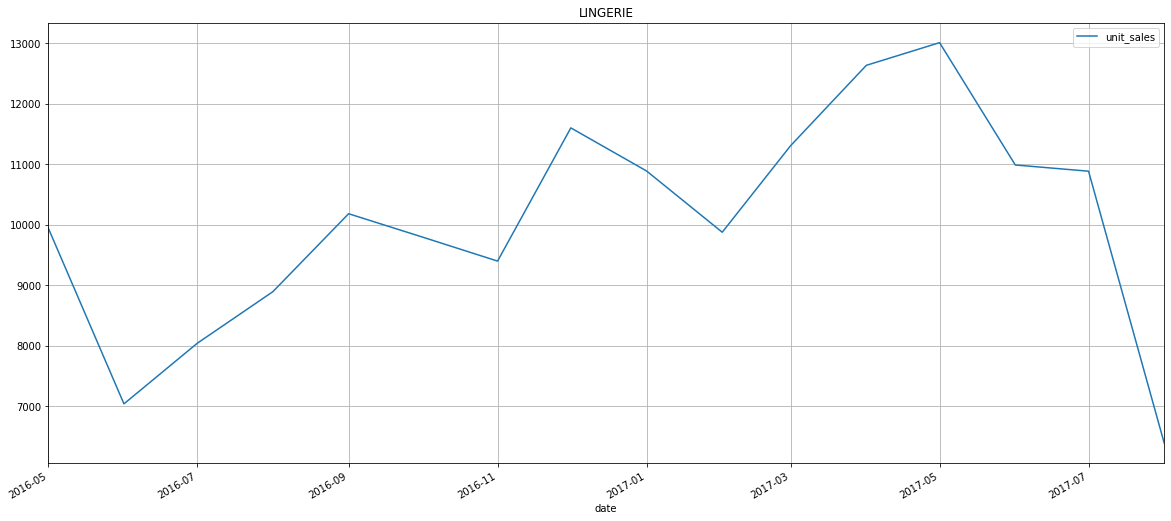

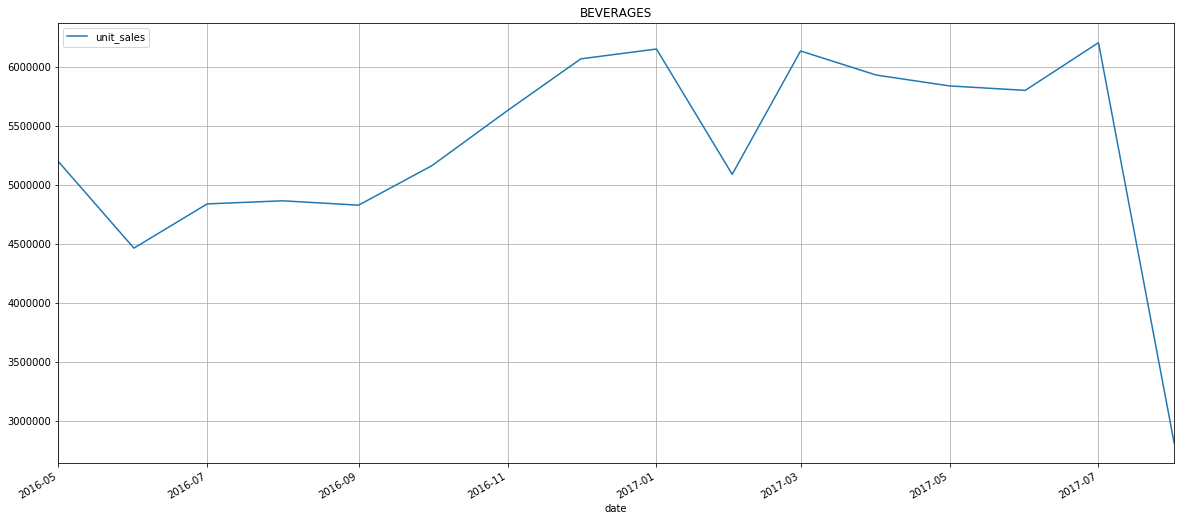

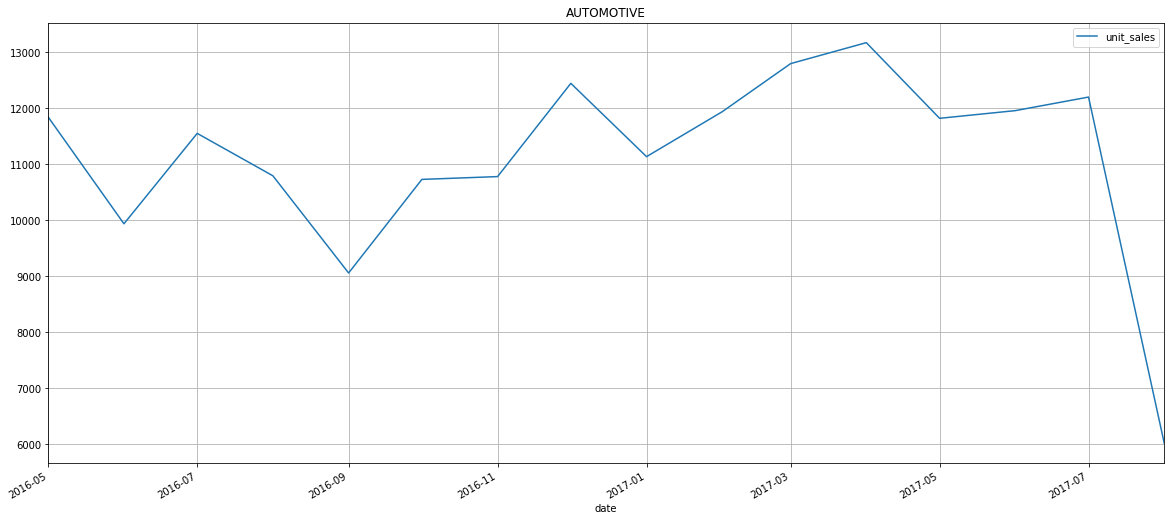

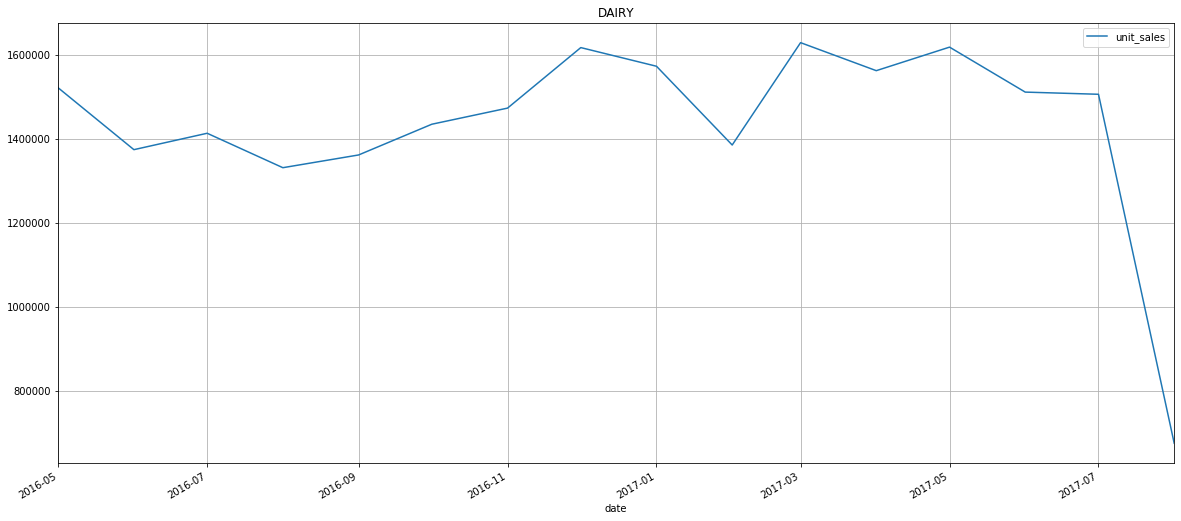

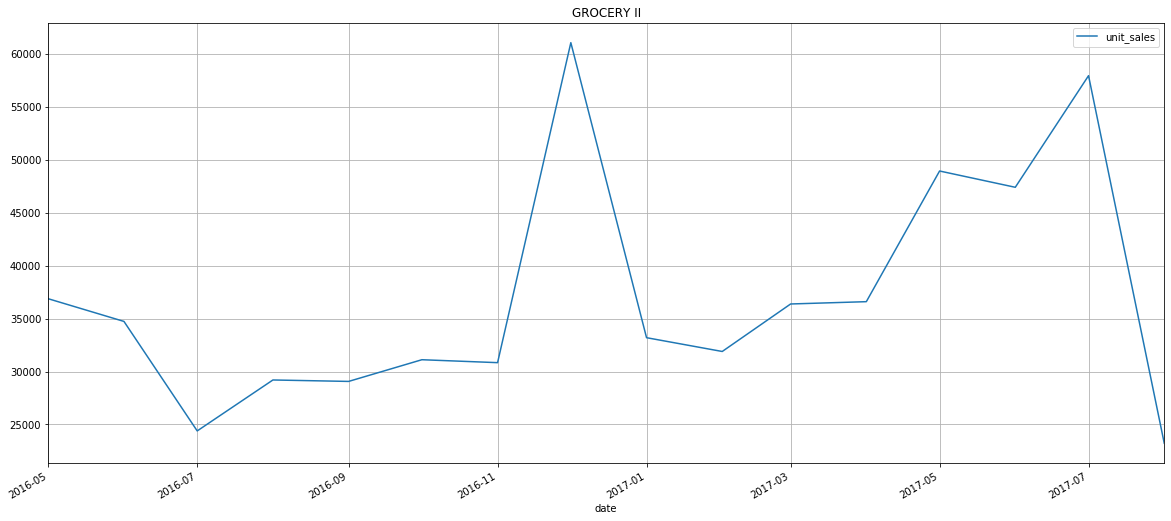

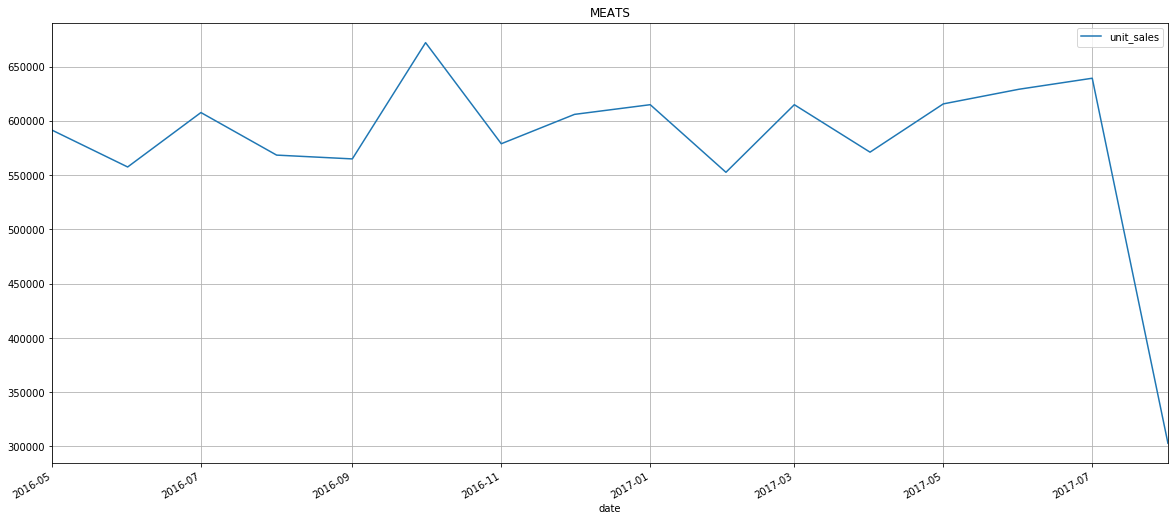

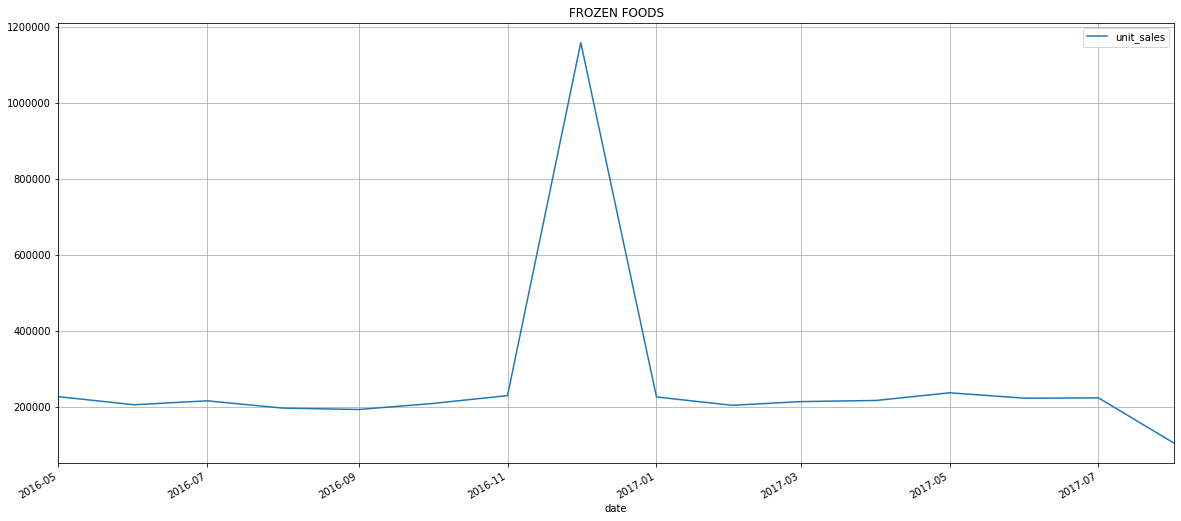

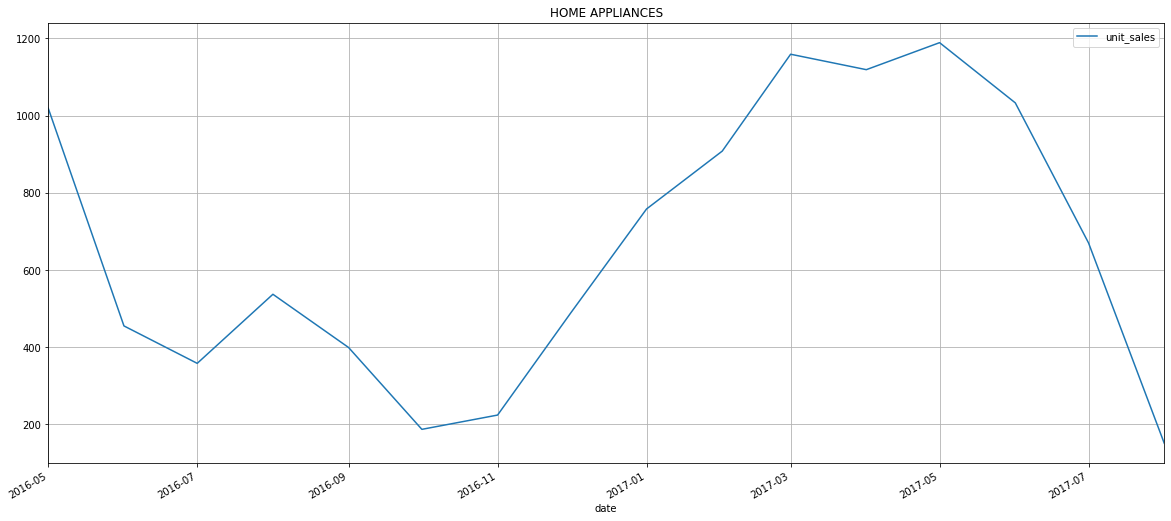

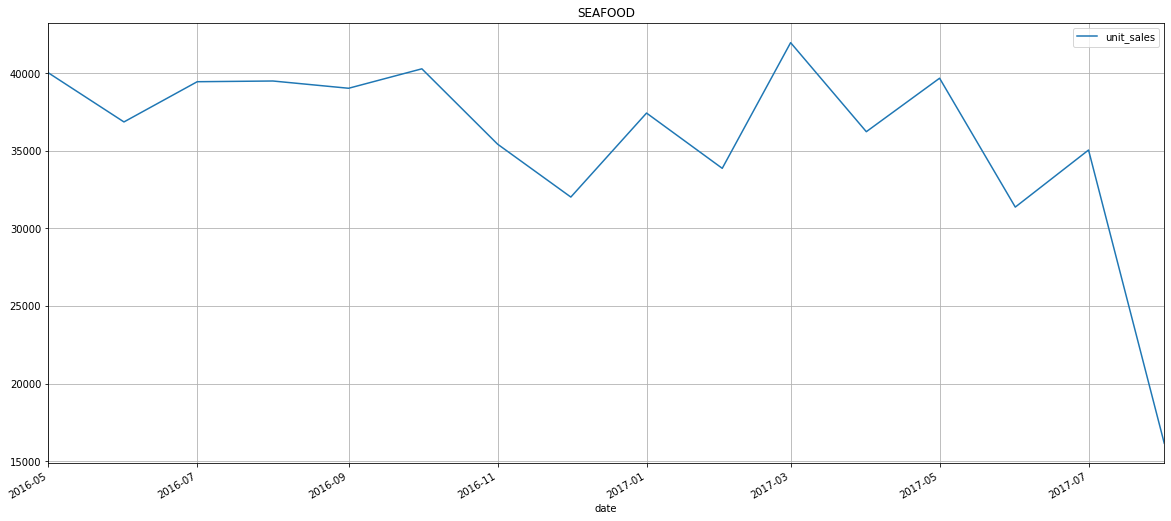

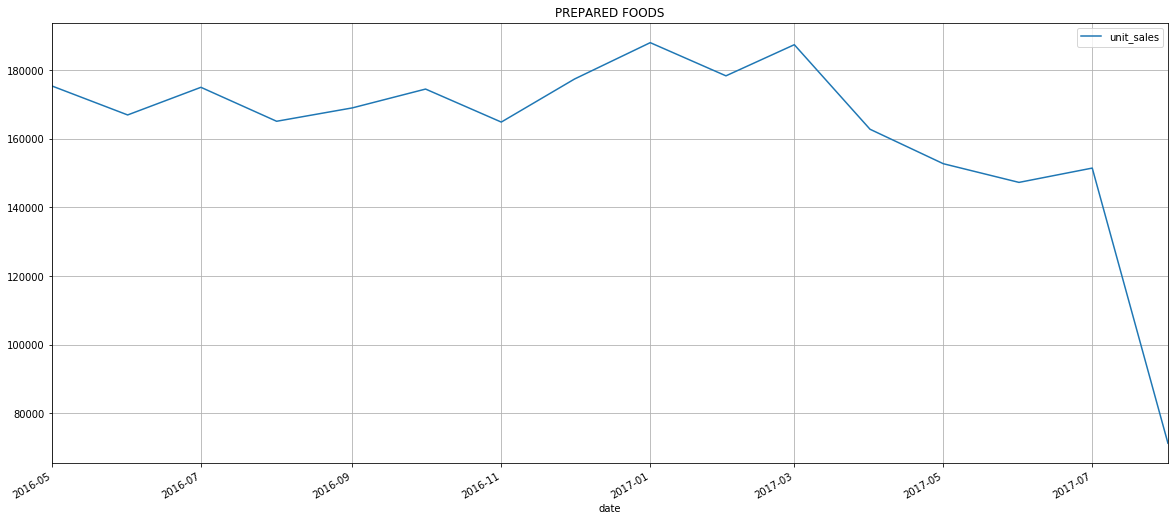

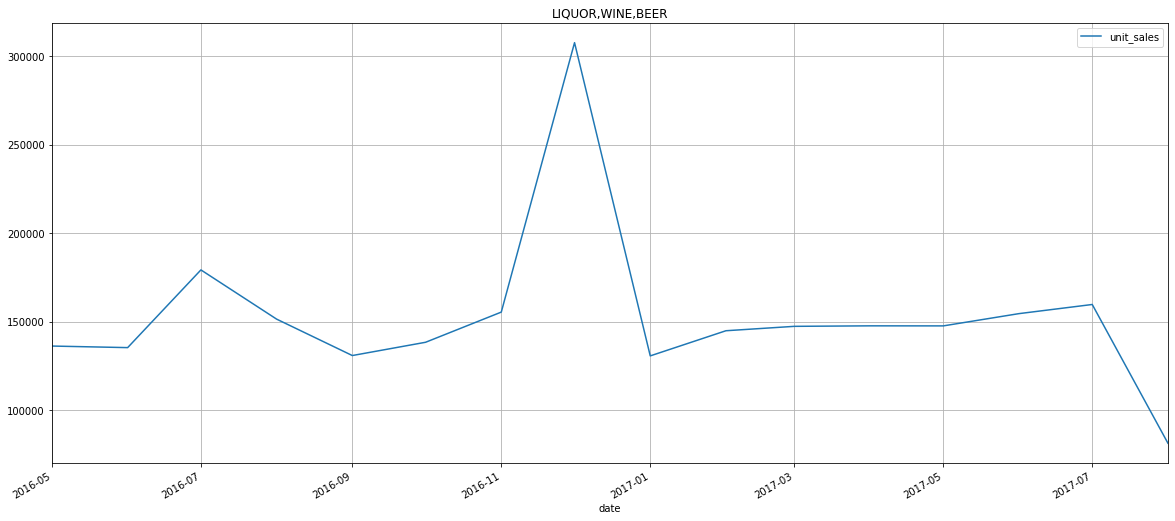

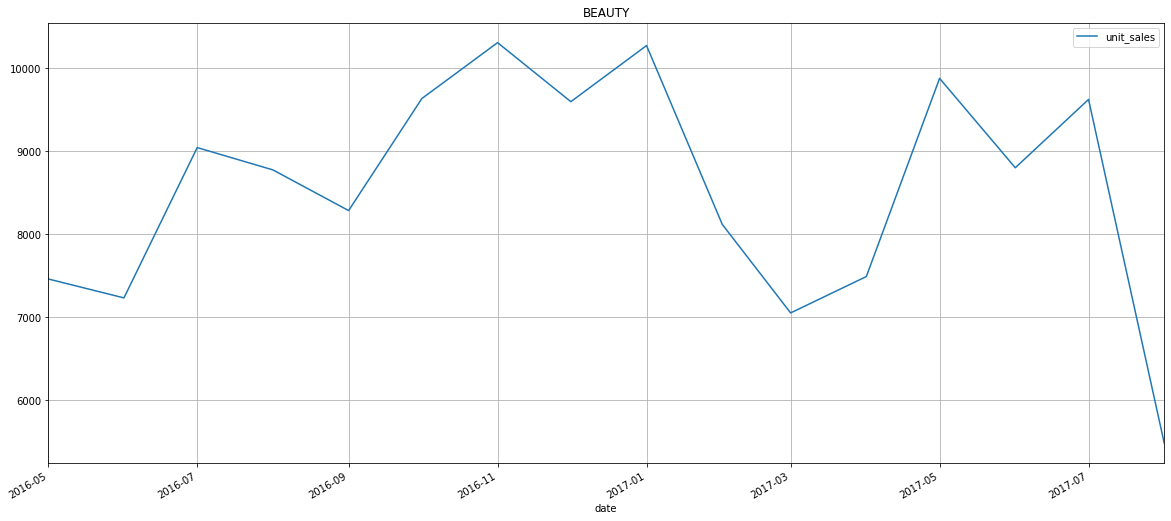

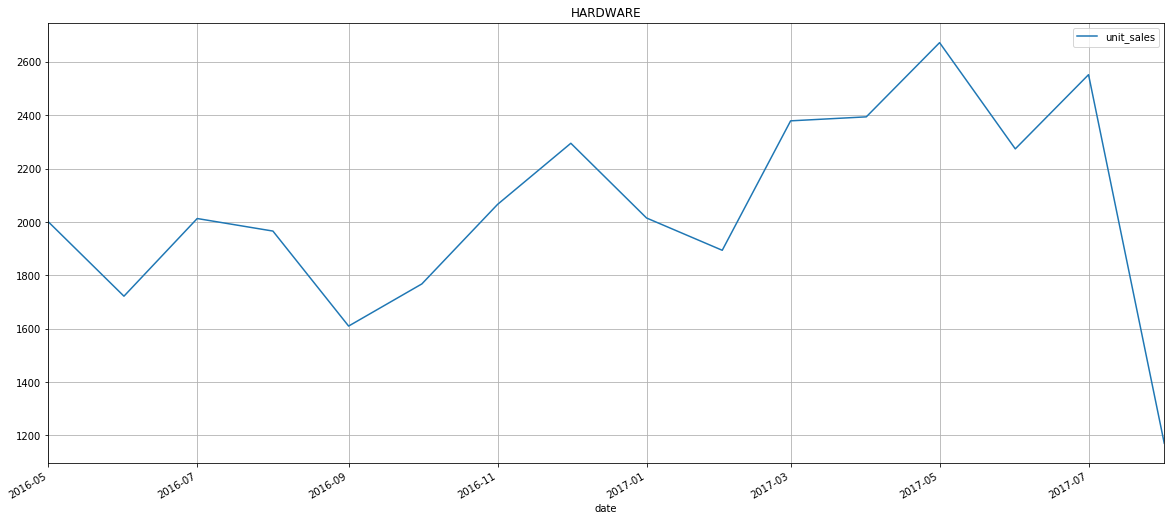

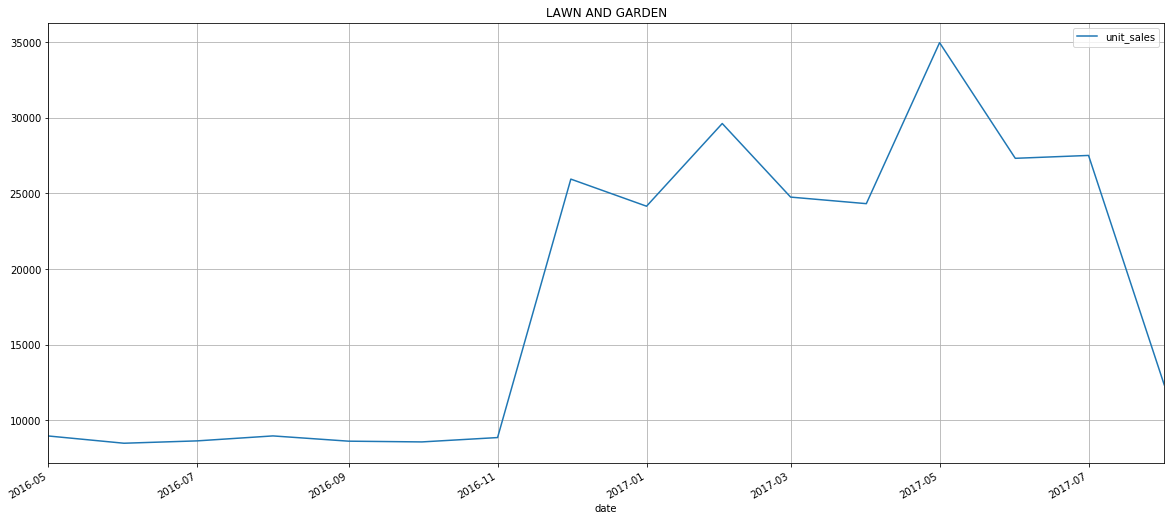

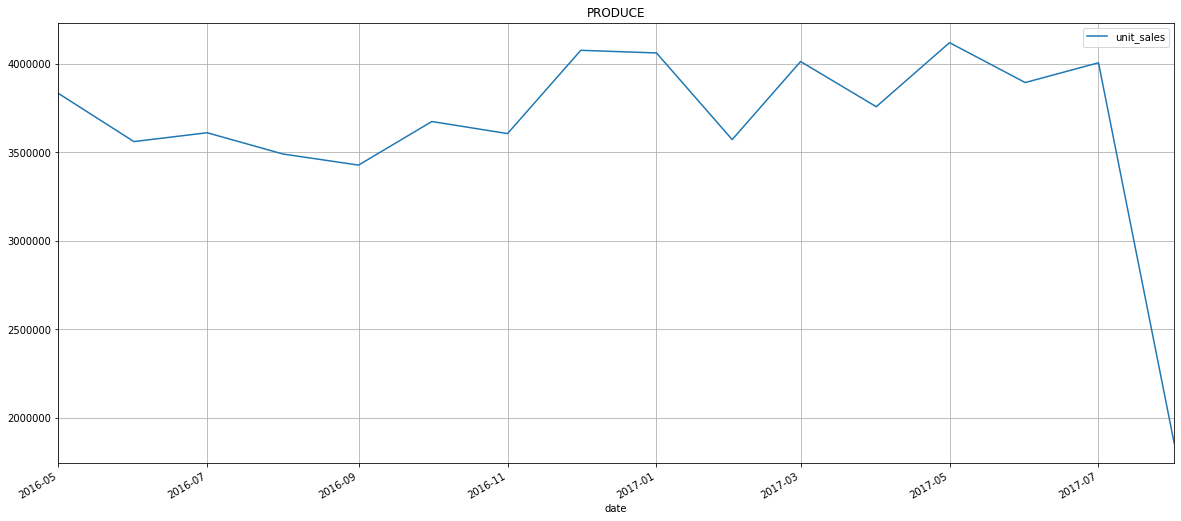

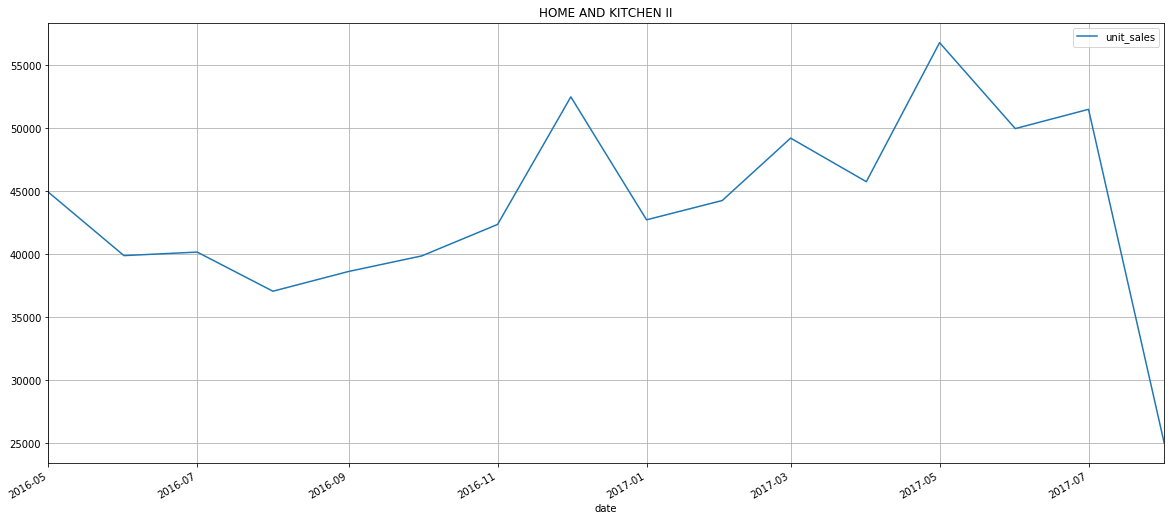

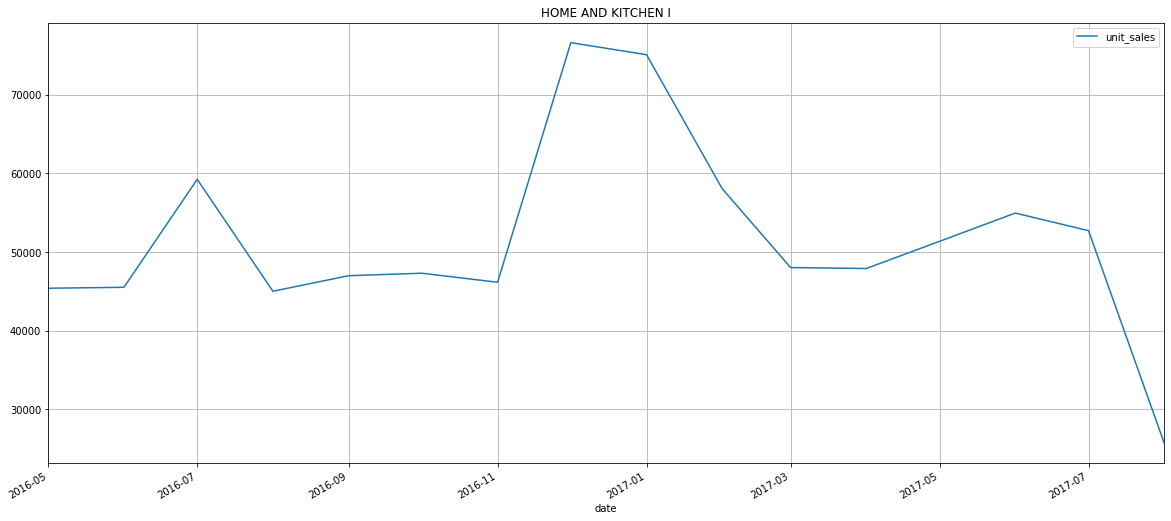

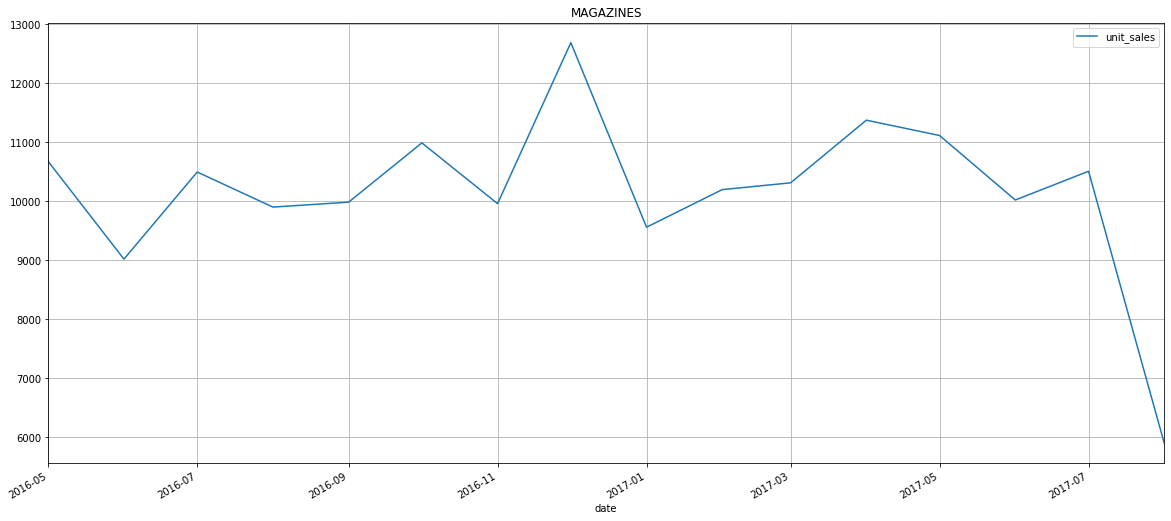

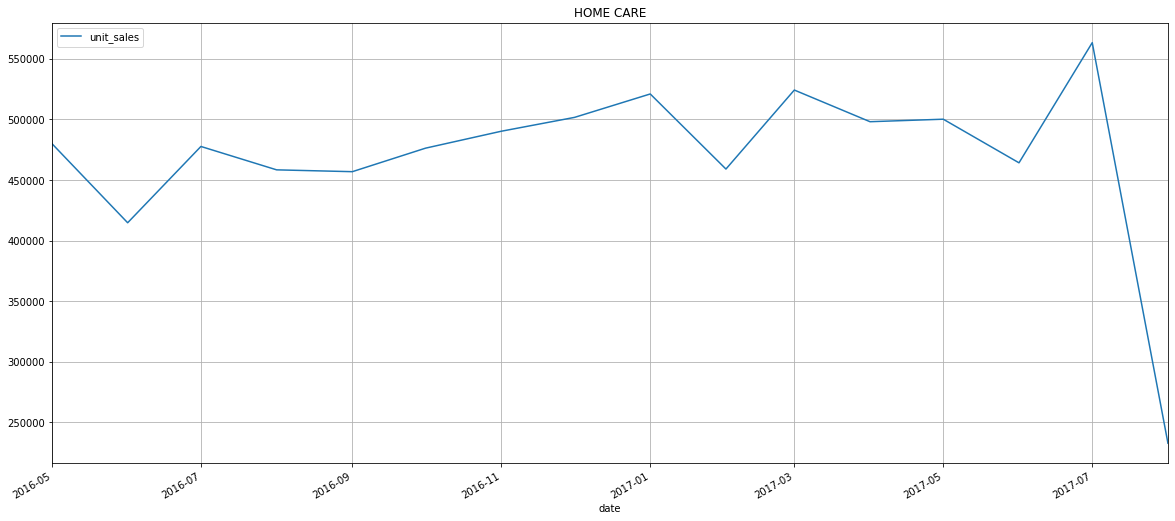

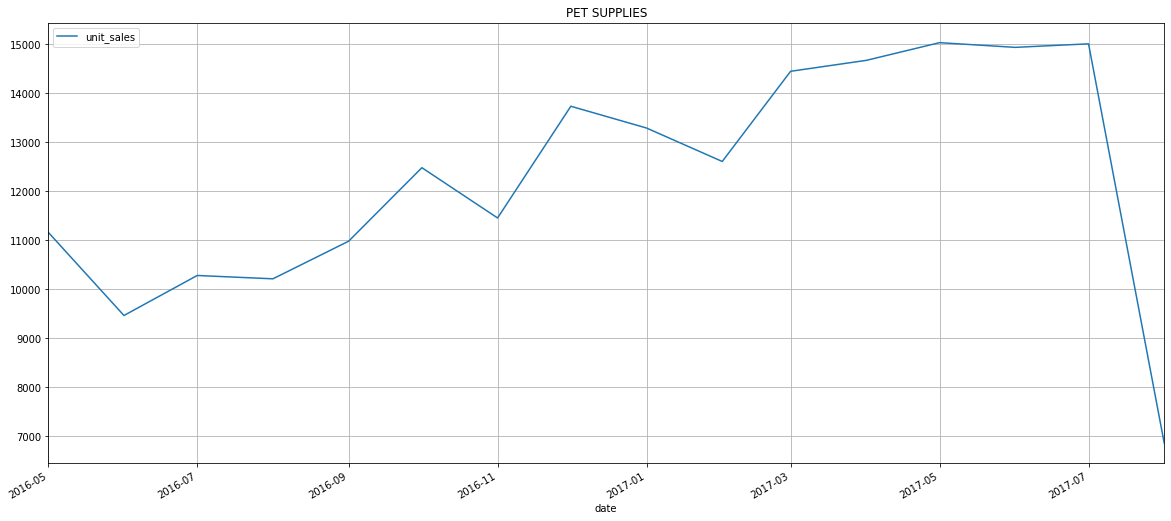

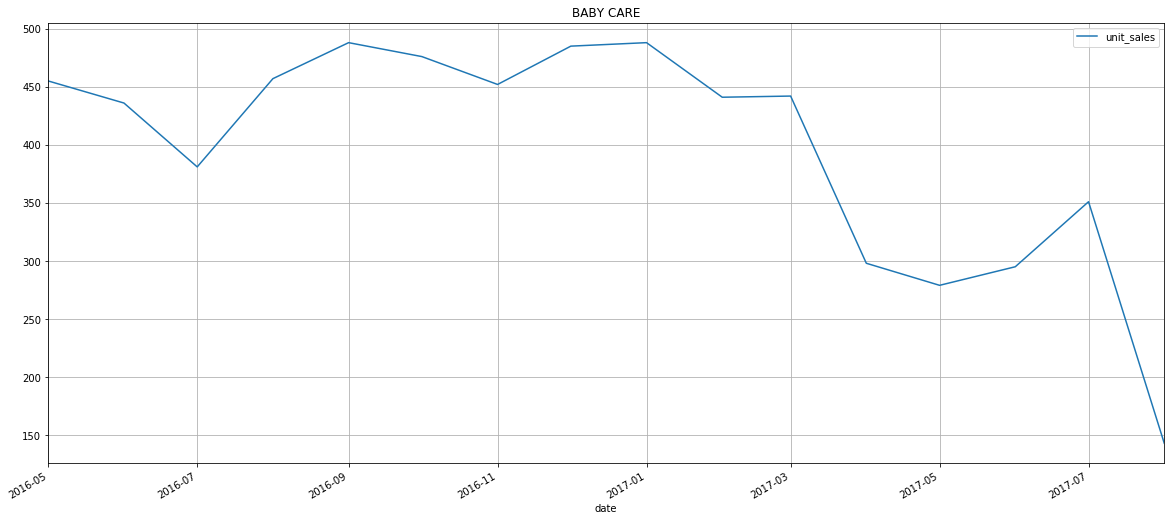

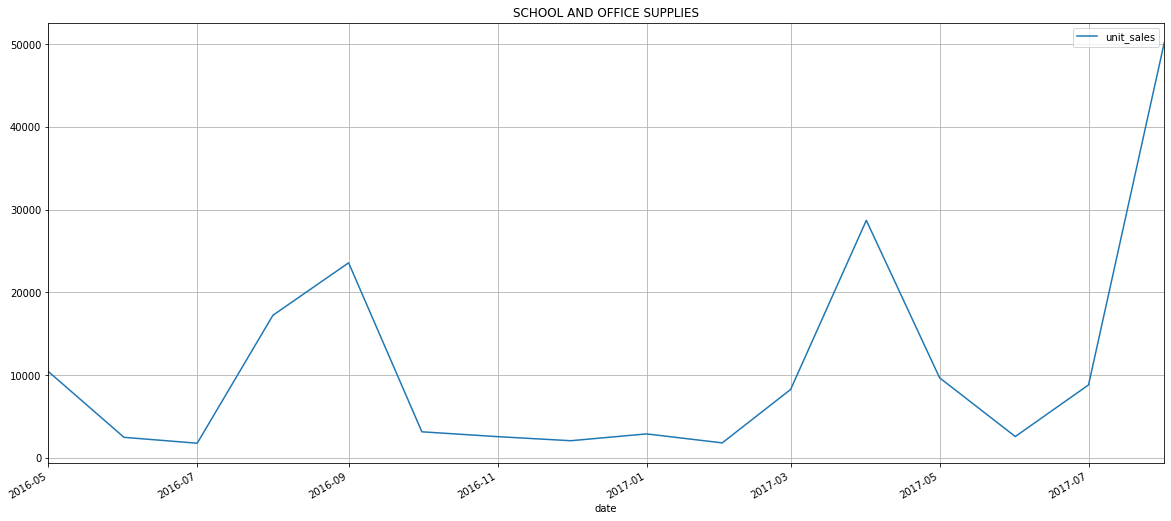

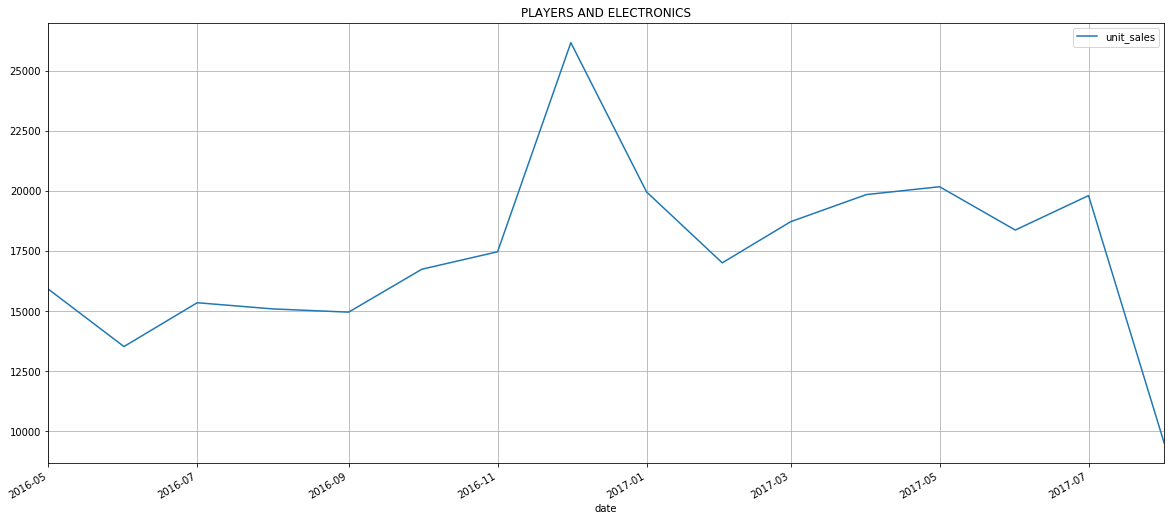

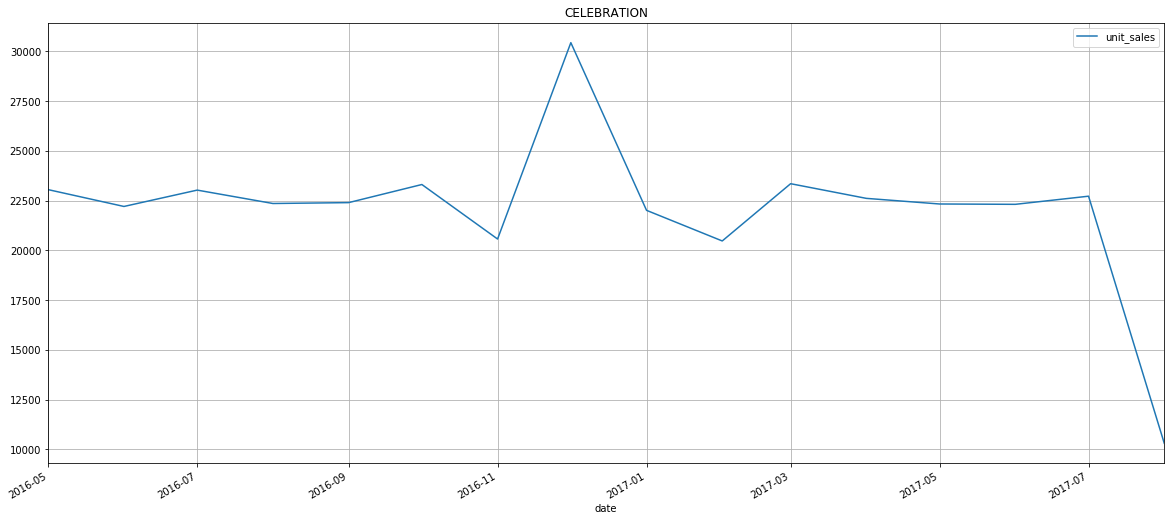

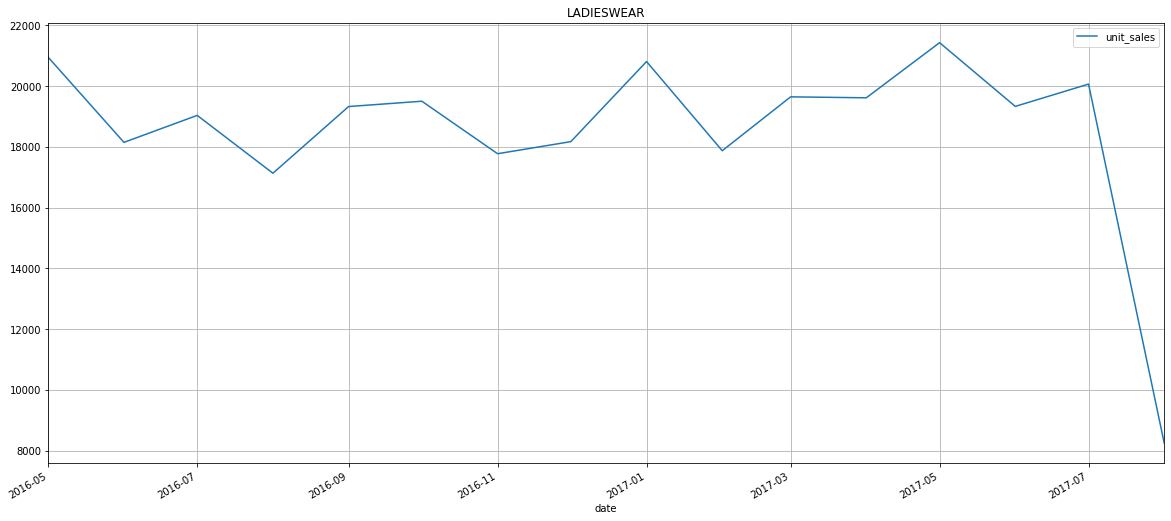

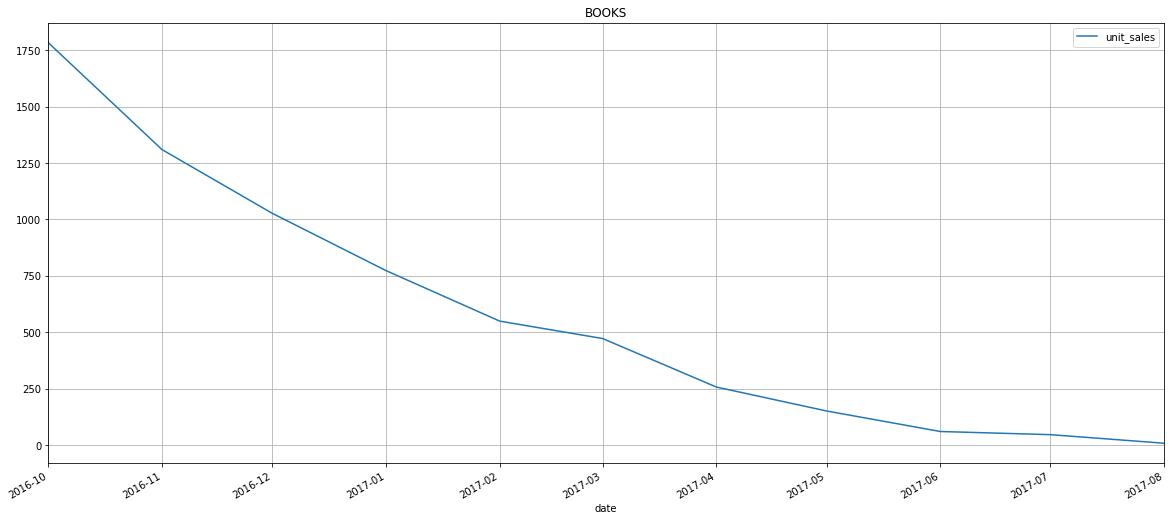

In [56]:
#before 16 April 2016 onwards
#for thomas
previous=0
familyy='test'

for i in data.family.unique():

    family=i
    
    train_with_family_groupbydate_family=train_with_family_groupbydate[train_with_family_groupbydate['family']==family]
    train_with_family_groupbydate_family['date'] =  pd.to_datetime(train_with_family_groupbydate_family['date'], format='%B-%Y')
    
    train_with_family_groupbydate_family=train_with_family_groupbydate_family[train_with_family_groupbydate_family['date'] > '2016-04-01']
    

    train_with_family_groupbydate_family.plot(x ='date', y='unit_sales', title=i, kind = 'line',grid=True,figsize=(20,9))	


    
    

   
    






In [53]:
# before earthquake
# sharp increase during end of year : GROCERY 1, CLEANING, BEVERAGES, GROCERY 2, FROZEN FOODS, SEAFOOD, PREPARED FOODS
# LIQUOR/WINE/BEER, PRODUCE, SCHOOL AND OFFICE SUPPLIES
# sharp decrease during end of year : MEATS, HOME AND KITCHEN 1, BABY CARE
# increase from 2014-05 : BREAD/BAKERY, DELI, EGGS, PERSONAL CARE, AUTOMOTIVE, BEAUTY
# increase from 2013-10 : POULTRY, DAIRY, LAWN AND GARDEN
# decrease : LINGERIE, HOME APPLIANCES, LADIESWEAR
# no trend : HARDWARE, HOME AND KITCHEN 2, MAGAZINES, HOME CARE, PET SUPPLIES, PLAYERS AND ELECTRONICS, CELEBRATION

# after earthquake
# sharp increase during end of year : GROCERY 1, CLEANING, PERSONAL CARE, GROCERY 2, FROZEN FOODS,PREPARED FOODS,
# LIQUOR/WINE/BEER, PRODUCE, HOME AND KITCHEN 1, PLAYERS AND ELECTRONICS, CELERBATION
# sharp decrease during end of year : SCHOOL AND OFFICE SUPPLIES
# increase from 2016-04 : LINGERIE, BEVERAGES, LAWN AND GARDEN, PET CARE
# no trend : HOME APPLIANCES, BEAUTY
# decrease : BABY CARE, BOOKS
# remain constant : BREAD/BAKERY, DELI, POULTRY, EGGS, AUTOMOTIVE, DAIRY, MEAT, SEAFOOD, HARDWARE, HOME AND KITCHEN 2,
# MAGAZINES, HOME CARE, LADIESWEAR

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,family,unit_sales
4,2013-04-01,CLEANING,1421226.0
26,2014-04-01,CLEANING,1452234.0
48,2015-04-01,CLEANING,1830427.0
138,2013-08-01,CLEANING,1462219.0
160,2014-08-01,CLEANING,1576156.0
184,2015-08-01,CLEANING,1920666.0
279,2013-12-01,CLEANING,1724908.0
303,2014-12-01,CLEANING,1981056.0
335,2015-12-01,CLEANING,2094086.0
398,2013-02-01,CLEANING,1302978.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a c

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a c

final
0.5426211681354839
LAWN AND GARDEN


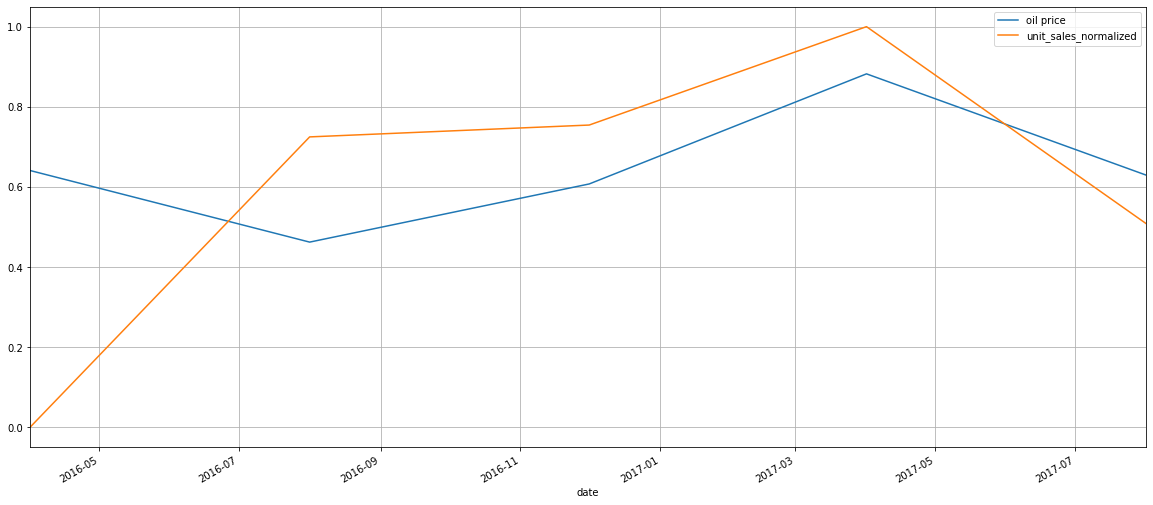

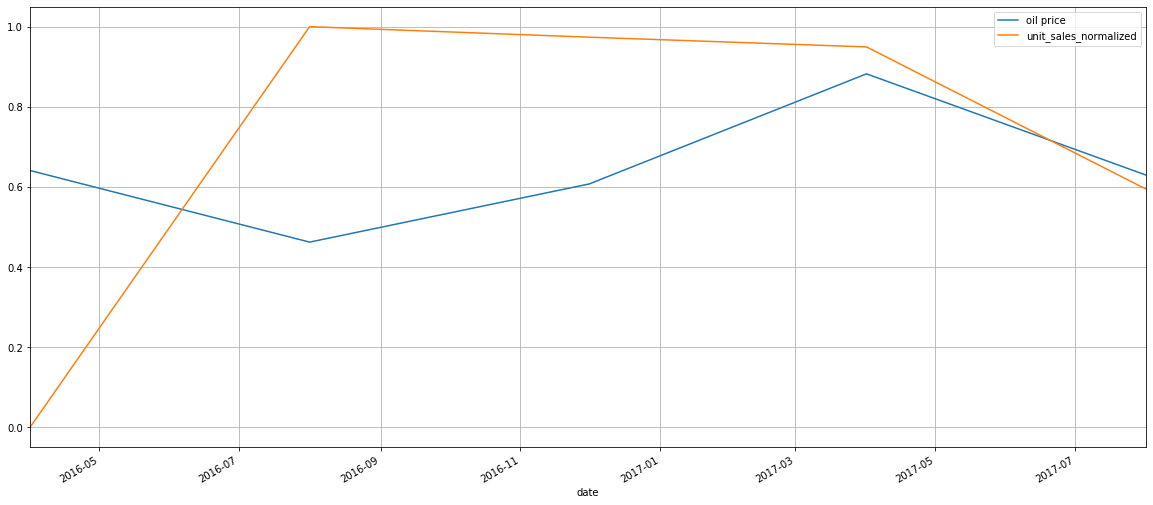

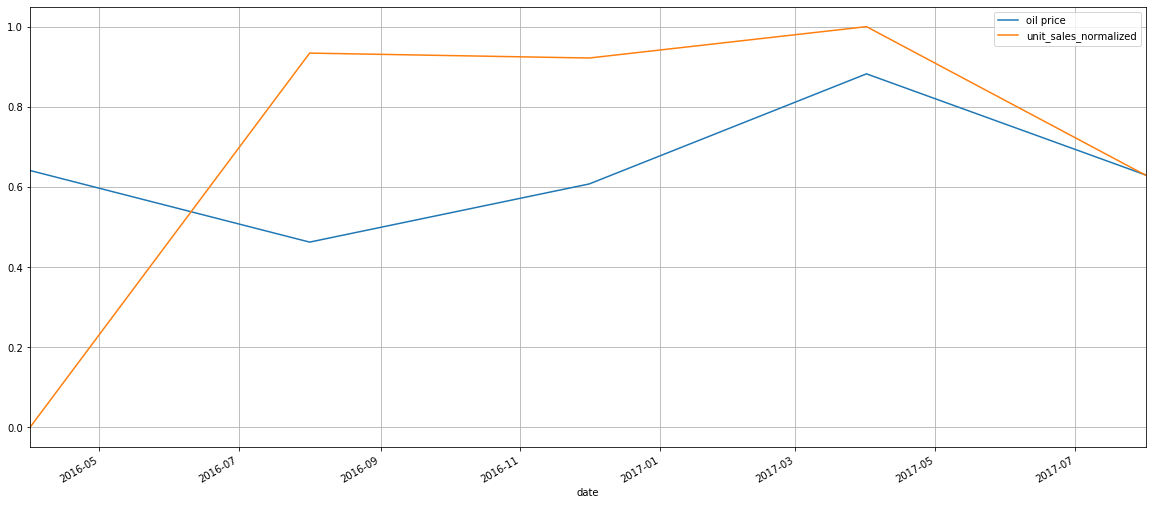

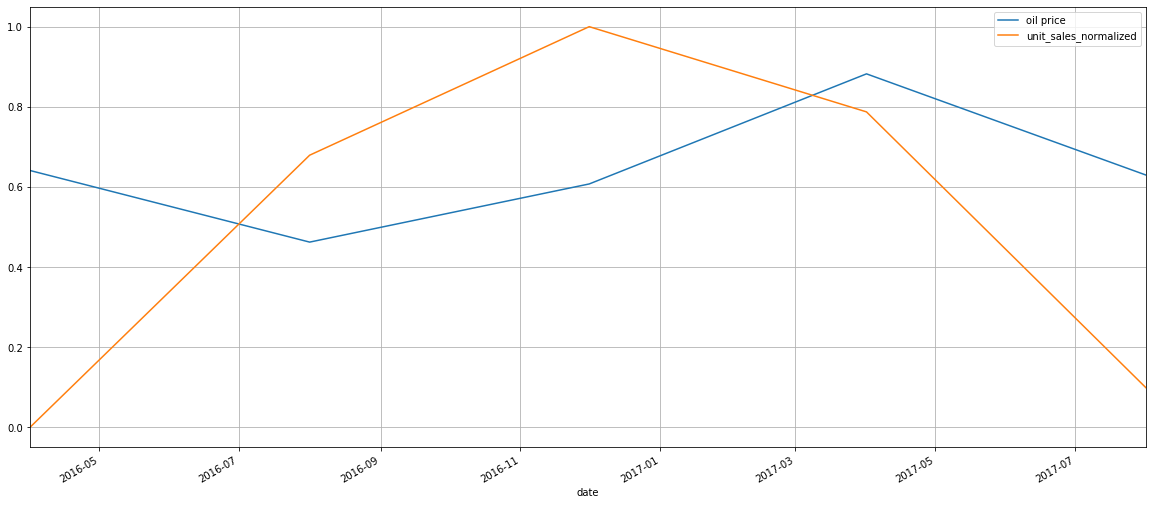

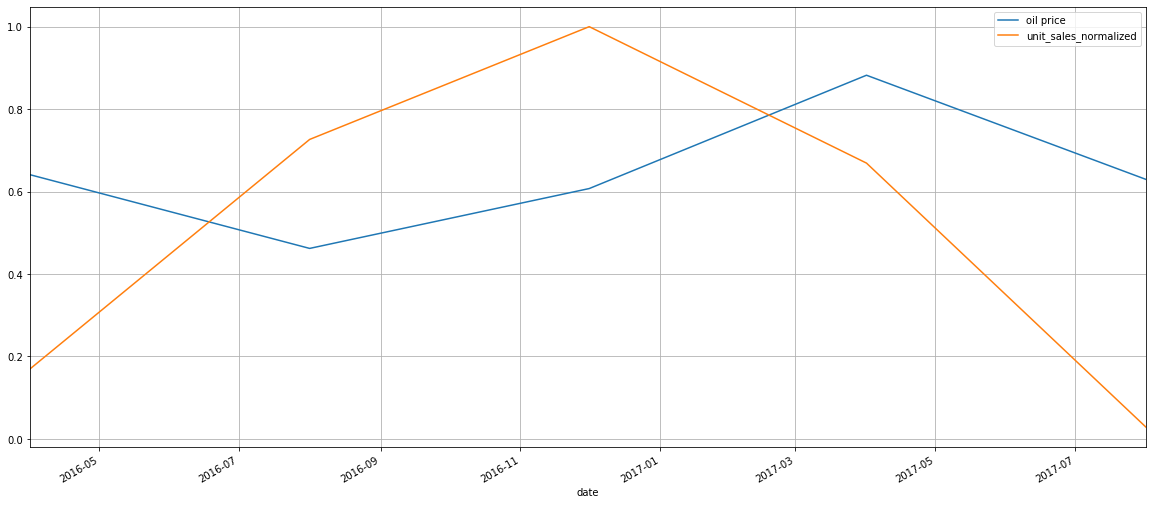

In [445]:
#after 16 April 2016 onwards
previous=0
familyy='test'

for i in data.family.unique():

    family=i
    train_with_family_groupbydate_family=train_with_family_groupbydate[train_with_family_groupbydate['family']==family]
    train_with_family_groupbydate_family['date'] =  pd.to_datetime(train_with_family_groupbydate_family['date'], format='%B-%Y')
    #train_with_family_groupbydate_family.plot(x ='date', y='unit_sales', kind = 'line',grid=True,figsize=(20,9))	
    
    train_with_family_groupbydate_family=train_with_family_groupbydate_family[train_with_family_groupbydate_family['date'] >= 'April-2016']


 
    
    train_with_family_groupbydate_family=train_with_family_groupbydate_family.dropna()

    a=transactions_oil_monthly.join(train_with_family_groupbydate_family.set_index('date'), on='date')
    a=a.dropna()
    b=a.drop(columns=['date','family'])

    import pandas as pd
    from sklearn import preprocessing

    x = b.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    corr=df.corr()
    corr_abs=abs(corr.values[0][1])
    if corr_abs > previous:
        previous=corr_abs
        familyy=i
        c=a.join(df)
        c=c.rename(columns={0: "oil price", 1: "unit_sales_normalized"})
        
        c=c.dropna()
        c.plot(x ='date', y=['oil price','unit_sales_normalized'], kind = 'line',grid=True,figsize=(20,9))

print ('final')
print (previous)
print (familyy)



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0.6961466756355115


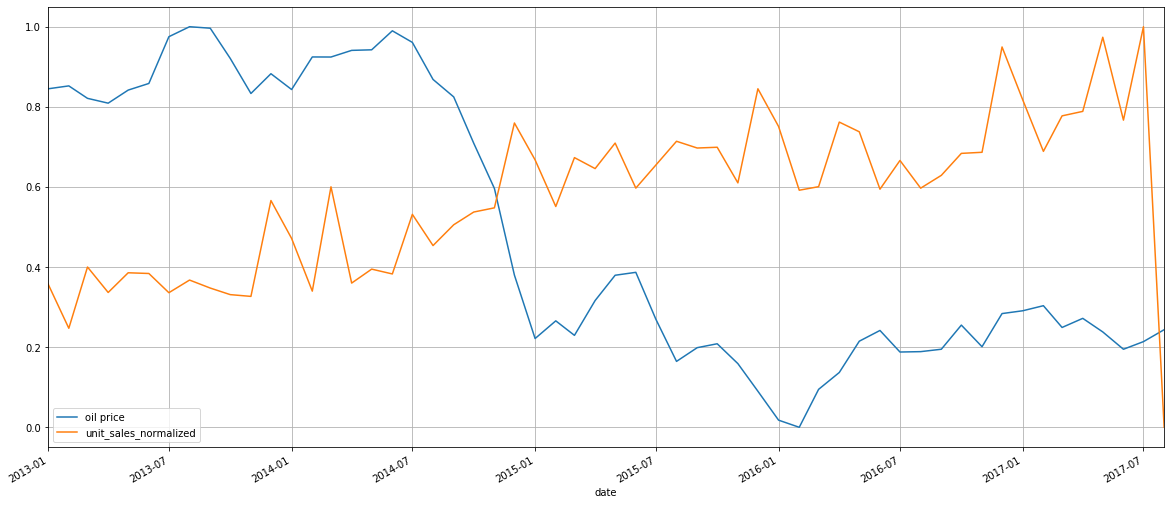

In [410]:
family='CLEANING'

train_with_family_groupbydate_family=train_with_family_groupbydate[train_with_family_groupbydate['family']==family]
train_with_family_groupbydate_family['date'] =  pd.to_datetime(train_with_family_groupbydate_family['date'], format='%B-%Y')
#train_with_family_groupbydate_family.plot(x ='date', y='unit_sales', kind = 'line',grid=True,figsize=(20,9))	

train_with_family_groupbydate_family=train_with_family_groupbydate_family.dropna()

a=transactions_oil_monthly.join(train_with_family_groupbydate_family.set_index('date'), on='date')
b=a.drop(columns=['date','family'])

import pandas as pd
from sklearn import preprocessing

x = b.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
corr=df.corr()
corr_abs=abs(corr.values[0][1])
print (corr_abs)
c=a.join(df)
c=c.rename(columns={0: "oil price", 1: "unit_sales_normalized"})

c.plot(x ='date', y=['oil price','unit_sales_normalized'], kind = 'line',grid=True,figsize=(20,9))

In [490]:
#after 16 April 2016 onwards find sales
for i in data.family.unique():

    family=i
    print (i)
    train_with_family_groupbydate_family=train_with_family_groupbydate[train_with_family_groupbydate['family']==family]
    train_with_family_groupbydate_family['date'] =  pd.to_datetime(train_with_family_groupbydate_family['date'], format='%B-%Y')
    #train_with_family_groupbydate_family.plot(x ='date', y='unit_sales', kind = 'line',grid=True,figsize=(20,9))	
    
   # train_with_family_groupbydate_family_before=train_with_family_groupbydate_family[train_with_family_groupbydate_family['date'] < 'April-2016']

   # train_with_family_groupbydate_family_after=train_with_family_groupbydate_family[train_with_family_groupbydate_family['date'] >= 'April-2016']

    #train_with_family_groupbydate_family_before.sort_values('date').unit_sales.pct_change()
    train_with_family_groupbydate_family=train_with_family_groupbydate_family.dropna()
    max_value=train_with_family_groupbydate_family.sort_values('date').unit_sales.pct_change().abs().max()
    print (max_value)
    train_with_family_groupbydate_family[train_with_family_groupbydate_family.sort_values('date').unit_sales.pct_change()==max_value]
    
    
    

    #train_with_family_groupbydate_family


GROCERY I
0.5288001000883192
CLEANING
0.5755454230309685
BREAD/BAKERY
0.5306739969949713
DELI
0.5491499404944911
POULTRY
0.7141619387688185
EGGS
0.5409807401449516
PERSONAL CARE
0.5198134636244797
LINGERIE
0.41317530319735396
BEVERAGES
1.3113014561604963
AUTOMOTIVE
0.5064360088546365
DAIRY
0.551953318299718
GROCERY II
0.9801854974704891
MEATS
0.5261134615559574
FROZEN FOODS
4.418020125824115
HOME APPLIANCES
23.76923076923077
SEAFOOD
0.5389773893417109
PREPARED FOODS
0.5291439788750807
LIQUOR,WINE,BEER
1.3179365501067268
BEAUTY


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0.4438233650083845
HARDWARE
0.6431451612903225
LAWN AND GARDEN
1.9276442036347219
PRODUCE
508.7850142031632
HOME AND KITCHEN II
1.1043044061214111
HOME AND KITCHEN I
0.6770857487362612
MAGAZINES
3.8759367194004994
HOME CARE
0.5870032089965496
PET SUPPLIES
46.365591397849464
BABY CARE
43.75
SCHOOL AND OFFICE SUPPLIES
9.45177993527508
PLAYERS AND ELECTRONICS
0.5208280737187578
CELEBRATION
0.5465669014084507
LADIESWEAR
0.5891264264713211
BOOKS
0.8260869565217391


In [491]:
train_with_family_groupbydate_test=train_with_family_groupbydate[train_with_family_groupbydate['family']=='PRODUCE']

In [493]:

train_with_family_groupbydate_test['date'] =  pd.to_datetime(train_with_family_groupbydate_test['date'], format='%B-%Y')


train_with_family_groupbydate_test

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,family,unit_sales
20,2013-04-01,PRODUCE,6.308000e+03
42,2014-04-01,PRODUCE,7.152000e+03
67,2015-04-01,PRODUCE,7.162000e+03
98,2016-04-01,PRODUCE,3.621327e+06
131,2017-04-01,PRODUCE,3.757053e+06
154,2013-08-01,PRODUCE,8.118000e+03
176,2014-08-01,PRODUCE,8.265000e+03
207,2015-08-01,PRODUCE,3.562252e+06
239,2016-08-01,PRODUCE,3.489905e+06
272,2017-08-01,PRODUCE,1.855595e+06


In [501]:
pd.options.display.float_format = '{:.2f}'.format

train_with_family_groupbydate_test.sort_values('date')


,date,family,unit_sales
979,2013-03-01,PRODUCE,4037.00
20,2013-04-01,PRODUCE,6308.00
1122,2013-05-01,PRODUCE,8836.00
838,2013-06-01,PRODUCE,8631.00
687,2013-07-01,PRODUCE,7463.00
154,2013-08-01,PRODUCE,8118.00
1496,2013-09-01,PRODUCE,6821.00
1377,2013-10-01,PRODUCE,5910.00
1258,2013-11-01,PRODUCE,6882.00
295,2013-12-01,PRODUCE,9794.00


In [29]:
transactions_oil
transactions_oil_monthly=transactions_oil.groupby([transactions_oil['date'].dt.strftime('%B-%Y')]).agg({'dcoilwtico': np.mean})

In [30]:
transactions_oil_monthly
transactions_oil_monthly=transactions_oil_monthly.reset_index(level=['date'])



In [31]:
pd.to_datetime(transactions_oil_monthly['date'], format='%B-%Y')

0    2013-04-01
1    2014-04-01
2    2015-04-01
3    2016-04-01
4    2017-04-01
5    2013-08-01
6    2014-08-01
7    2015-08-01
8    2016-08-01
9    2017-08-01
10   2013-12-01
11   2014-12-01
12   2015-12-01
13   2016-12-01
14   2013-02-01
15   2014-02-01
16   2015-02-01
17   2016-02-01
18   2017-02-01
19   2013-01-01
20   2014-01-01
21   2015-01-01
22   2016-01-01
23   2017-01-01
24   2013-07-01
25   2014-07-01
26   2015-07-01
27   2016-07-01
28   2017-07-01
29   2013-06-01
30   2014-06-01
31   2015-06-01
32   2016-06-01
33   2017-06-01
34   2013-03-01
35   2014-03-01
36   2015-03-01
37   2016-03-01
38   2017-03-01
39   2013-05-01
40   2014-05-01
41   2015-05-01
42   2016-05-01
43   2017-05-01
44   2013-11-01
45   2014-11-01
46   2015-11-01
47   2016-11-01
48   2013-10-01
49   2014-10-01
50   2015-10-01
51   2016-10-01
52   2013-09-01
53   2014-09-01
54   2015-09-01
55   2016-09-01
Name: date, dtype: datetime64[ns]

In [33]:
transactions_oil_monthly['date'] =  pd.to_datetime(transactions_oil_monthly['date'], format='%B-%Y')



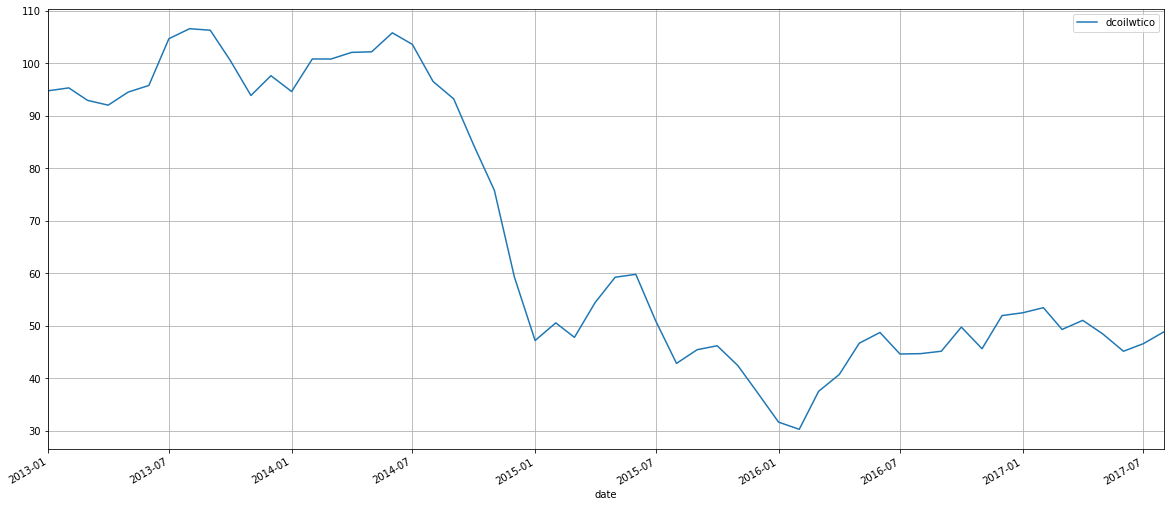

In [34]:
transactions_oil_monthly.plot(x ='date', y='dcoilwtico', kind = 'line',grid=True,figsize=(20,9))	



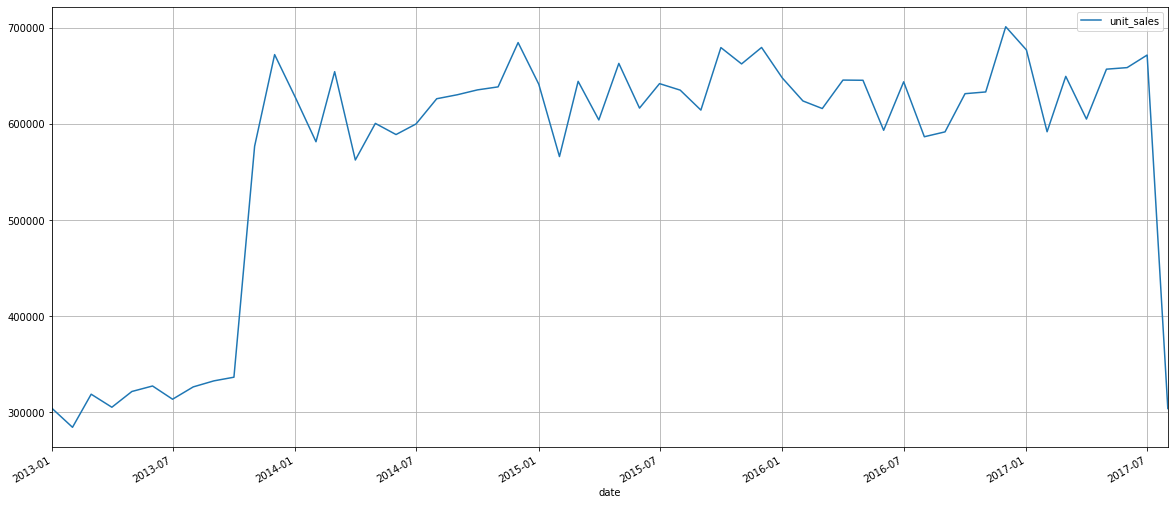

In [296]:
train_with_family_groupbydate_family.plot(x ='date', y='unit_sales', kind = 'line',grid=True,figsize=(20,9))	



In [358]:
a=transactions_oil_monthly.join(train_with_family_groupbydate_family.set_index('date'), on='date')


In [357]:
a.plot(x ='date', y=['dcoilwtico','unit_sales'], kind = 'line',grid=True,figsize=(20,9))	



KeyError: 'date'

In [351]:
import pandas as pd
from sklearn import preprocessing

x = a.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [352]:
df

,0,1
0,0.809162,0.050077
1,0.940935,0.667257
2,0.316458,0.767281
3,0.136817,0.866785
4,0.271969,0.769476
5,1.000000,0.100864
6,0.868373,0.820209
7,0.164520,0.841700
8,0.188871,0.725346
9,0.243669,0.046747


In [359]:
c=a.join(df)

In [360]:
c=c.rename(columns={0: "oil price", 1: "unit_sales_normalized"})

In [361]:
c


,date,dcoilwtico,family,unit_sales,oil price,unit_sales_normalized
0,2013-04-01,92.021364,POULTRY,305240.5230,0.809162,0.050077
1,2014-04-01,102.069048,POULTRY,562509.1062,0.940935,0.667257
2,2015-04-01,54.452857,POULTRY,604203.4710,0.316458,0.767281
3,2016-04-01,40.755238,POULTRY,645681.3310,0.136817,0.866785
4,2017-04-01,51.060526,POULTRY,605118.5930,0.271969,0.769476
5,2013-08-01,106.572727,POULTRY,326411.2140,1.000000,0.100864
6,2014-08-01,96.536190,POULTRY,626266.6050,0.868373,0.820209
7,2015-08-01,42.867619,POULTRY,635224.9730,0.164520,0.841700
8,2016-08-01,44.724348,POULTRY,586723.1790,0.188871,0.725346
9,2017-08-01,48.902727,POULTRY,303852.6640,0.243669,0.046747


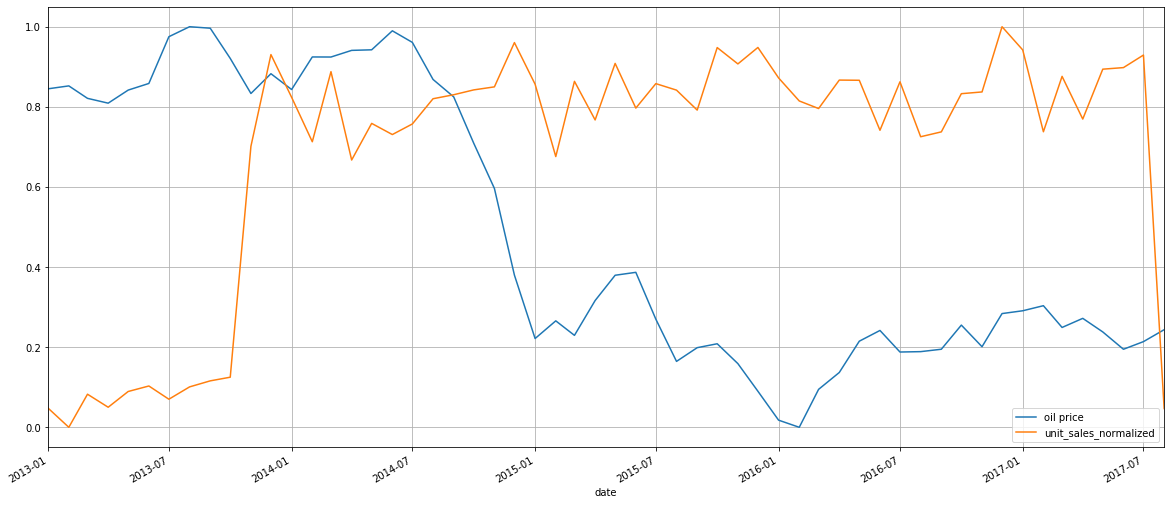

In [362]:
c.plot(x ='date', y=['oil price','unit_sales_normalized'], kind = 'line',grid=True,figsize=(20,9))


In [364]:
transactions_oil_monthly

,date,dcoilwtico
0,2013-04-01,92.021364
1,2014-04-01,102.069048
2,2015-04-01,54.452857
3,2016-04-01,40.755238
4,2017-04-01,51.060526
5,2013-08-01,106.572727
6,2014-08-01,96.536190
7,2015-08-01,42.867619
8,2016-08-01,44.724348
9,2017-08-01,48.902727


In [366]:
a

,date,dcoilwtico,family,unit_sales
0,2013-04-01,92.021364,POULTRY,305240.5230
1,2014-04-01,102.069048,POULTRY,562509.1062
2,2015-04-01,54.452857,POULTRY,604203.4710
3,2016-04-01,40.755238,POULTRY,645681.3310
4,2017-04-01,51.060526,POULTRY,605118.5930
5,2013-08-01,106.572727,POULTRY,326411.2140
6,2014-08-01,96.536190,POULTRY,626266.6050
7,2015-08-01,42.867619,POULTRY,635224.9730
8,2016-08-01,44.724348,POULTRY,586723.1790
9,2017-08-01,48.902727,POULTRY,303852.6640
